In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm
import uproot
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
plt.rcParams.update({'font.size': 18})



from root_numpy import root2array
from scipy.interpolate import interp1d
from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
folder = "gamma3d"
folder_corr= 'gammacorrelation'
TREE_CLUSTER = "Clustertree"
TREE_MATCHING = "Matchingtree"
TREE_SPS="Sps_Correlationtree"
TREE_EVENT="Event_Correlationtree"

In [4]:
CLEAN_REGION = 'Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)'
MATCH_CUT='Y_cluster_3d_hit_y > -120.0 and Y_cluster_3d_hit_y < 120.0'

In [5]:
cluster_track_file_v00='/uboone/data/users/abhat/GammaCatcher/low_threshold/cluster_track_distance_1tick_v00.root'
gammacorrelation_file_v00='/uboone/data/users/abhat/GammaCatcher/low_threshold/gammacorrelation_1tick_v00.root'

cluster_track_file_v01='/uboone/data/users/abhat/GammaCatcher/low_threshold/cluster_track_distance_1tick_v01.root'
gammacorrelation_file_v01='/uboone/data/users/abhat/GammaCatcher/low_threshold/gammacorrelation_1tick_v01.root'

cluster_track_file_v02='/uboone/data/users/abhat/GammaCatcher/low_threshold/cluster_track_distance_1tick_v02.root'
gammacorrelation_file_v02='/uboone/data/users/abhat/GammaCatcher/low_threshold/gammacorrelation_1tick_v02.root'

cluster_track_file_v03='/uboone/data/users/abhat/GammaCatcher/low_threshold/cluster_track_distance_1tick_v03.root'
gammacorrelation_file_v03='/uboone/data/users/abhat/GammaCatcher/low_threshold/gammacorrelation_1tick_v03.root'


cluster_track_file_v04='/uboone/data/users/abhat/GammaCatcher/low_threshold/cluster_track_distance_1tick_v04.root'
gammacorrelation_file_v04='/uboone/data/users/abhat/GammaCatcher/low_threshold/gammacorrelation_1tick_v04.root'

cluster_track_file_v04_3tick='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04_NO_CONE.root'


cluster_track_file_v05='/uboone/data/users/abhat/GammaCatcher/low_threshold/cluster_track_distance_1tick_v05.root'
gammacorrelation_file_v05='/uboone/data/users/abhat/GammaCatcher/low_threshold/gammacorrelation_1tick_v05.root'


In [6]:
Cluster_tree_v00 = uproot.open(cluster_track_file_v00)[folder][TREE_CLUSTER]
Matching_tree_v00 = uproot.open(cluster_track_file_v00)[folder][TREE_MATCHING]
Sps_tree_v00=uproot.open(gammacorrelation_file_v00)[folder_corr][TREE_SPS]
Event_tree_v00=uproot.open(gammacorrelation_file_v00)[folder_corr][TREE_EVENT]

Cluster_tree_v01 = uproot.open(cluster_track_file_v01)[folder][TREE_CLUSTER]
Matching_tree_v01 = uproot.open(cluster_track_file_v01)[folder][TREE_MATCHING]
Sps_tree_v01=uproot.open(gammacorrelation_file_v01)[folder_corr][TREE_SPS]
Event_tree_v01=uproot.open(gammacorrelation_file_v01)[folder_corr][TREE_EVENT]

Cluster_tree_v02 = uproot.open(cluster_track_file_v02)[folder][TREE_CLUSTER]
Matching_tree_v02 = uproot.open(cluster_track_file_v02)[folder][TREE_MATCHING]
Sps_tree_v02=uproot.open(gammacorrelation_file_v02)[folder_corr][TREE_SPS]
Event_tree_v02=uproot.open(gammacorrelation_file_v02)[folder_corr][TREE_EVENT]


Cluster_tree_v03 = uproot.open(cluster_track_file_v03)[folder][TREE_CLUSTER]
Matching_tree_v03 = uproot.open(cluster_track_file_v03)[folder][TREE_MATCHING]
Sps_tree_v03=uproot.open(gammacorrelation_file_v03)[folder_corr][TREE_SPS]
Event_tree_v03=uproot.open(gammacorrelation_file_v03)[folder_corr][TREE_EVENT]

Cluster_tree_v04 = uproot.open(cluster_track_file_v04)[folder][TREE_CLUSTER]
Matching_tree_v04 = uproot.open(cluster_track_file_v04)[folder][TREE_MATCHING]
Sps_tree_v04=uproot.open(gammacorrelation_file_v04)[folder_corr][TREE_SPS]
Event_tree_v04=uproot.open(gammacorrelation_file_v04)[folder_corr][TREE_EVENT]


Cluster_tree_v04_3tick = uproot.open(cluster_track_file_v04_3tick)[folder][TREE_CLUSTER]
Matching_tree_v04_3tick = uproot.open(cluster_track_file_v04_3tick)[folder][TREE_MATCHING]


Cluster_tree_v05 = uproot.open(cluster_track_file_v05)[folder][TREE_CLUSTER]
Matching_tree_v05 = uproot.open(cluster_track_file_v05)[folder][TREE_MATCHING]
Sps_tree_v05=uproot.open(gammacorrelation_file_v05)[folder_corr][TREE_SPS]
Event_tree_v05=uproot.open(gammacorrelation_file_v05)[folder_corr][TREE_EVENT]

In [7]:
df_Matching_v00=Matching_tree_v00.pandas.df().query(CLEAN_REGION)
df_Cluster_v00=Cluster_tree_v00.pandas.df()
df_Correlation_v00_Event=Event_tree_v00.pandas.df()
df_Correlation_v00_Sps=Sps_tree_v00.pandas.df()


df_Matching_v01=Matching_tree_v01.pandas.df().query(CLEAN_REGION)
df_Cluster_v01=Cluster_tree_v01.pandas.df()
df_Correlation_v01_Event=Event_tree_v01.pandas.df()
df_Correlation_v01_Sps=Sps_tree_v01.pandas.df()


df_Matching_v02=Matching_tree_v02.pandas.df().query(CLEAN_REGION)
df_Cluster_v02=Cluster_tree_v02.pandas.df()
df_Correlation_v02_Event=Event_tree_v02.pandas.df()
df_Correlation_v02_Sps=Sps_tree_v02.pandas.df()


df_Matching_v03=Matching_tree_v03.pandas.df().query(CLEAN_REGION)
df_Cluster_v03=Cluster_tree_v03.pandas.df()
df_Correlation_v03_Event=Event_tree_v03.pandas.df()
df_Correlation_v03_Sps=Sps_tree_v03.pandas.df()


df_Matching_v04=Matching_tree_v04.pandas.df().query(CLEAN_REGION)
df_Cluster_v04=Cluster_tree_v04.pandas.df()
df_Correlation_v04_Event=Event_tree_v04.pandas.df()
df_Correlation_v04_Sps=Sps_tree_v04.pandas.df()


df_Matching_v04_3tick=Matching_tree_v04_3tick.pandas.df().query(CLEAN_REGION)
df_Cluster_v04_3tick=Cluster_tree_v04_3tick.pandas.df()


df_Matching_v05=Matching_tree_v05.pandas.df().query(CLEAN_REGION)
df_Cluster_v05=Cluster_tree_v05.pandas.df()
df_Correlation_v05_Event=Event_tree_v05.pandas.df()
df_Correlation_v05_Sps=Sps_tree_v05.pandas.df()

In [8]:
df_Matching_v00.head()

,V_biggest_iou,V_match_multiplicity,U_biggest_iou,U_match_multiplicity,Y_clus_lifetime,Y_clus_hitSize,V_clus_hitSize,U_clus_hitSize,Y_cluster_3d_hit_z,Y_cluster_3d_hit_x,...,YU_iou,deltaY,deltaY_smallest,Y_Wire,start_tick_cluster0,start_tick_cluster1,start_tick_cluster2,end_tick_cluster0,end_tick_cluster1,end_tick_cluster2
entry,,,,,,,,,,,,,,,,,,,,,
12,0.512695,2,0.798068,1,2.000000,1.0,1.0,2.0,495.899999,148.427845,...,0.798068,0.173205,0.173205,1653,0.0,0.0,0.0,0.0,0.0,0.0
13,-1.000000,0,0.312485,1,2.228271,2.0,1.0,2.0,533.099999,86.670410,...,0.312485,-9999.000000,0.173205,1778,0.0,0.0,0.0,0.0,0.0,0.0
14,-1.000000,0,-1.000000,0,2.000000,1.0,1.0,2.0,596.399999,148.773642,...,-1.000000,-9999.000000,0.173205,1988,0.0,0.0,0.0,0.0,0.0,0.0
16,0.794917,2,0.965923,1,2.000000,1.0,1.0,2.0,882.599998,14.577004,...,0.965923,0.173205,0.173205,2942,0.0,0.0,0.0,0.0,0.0,0.0
17,0.752956,2,0.677528,1,2.000000,1.0,1.0,2.0,898.199998,2.383681,...,0.677528,-0.173205,0.173205,2994,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_Cluster_v00.head()

,cluster_hit_z,cluster_hit_x,Z_reco_best,X_reco_best,distance_smallest,plane
entry,,,,,,
0,0.0,7.532989,36.138336,-19.167997,90.421727,0
1,0.0,63.949930,0.556012,41.979740,111.460354,0
2,0.0,77.383028,0.556012,41.979740,114.865635,0
3,0.0,136.102099,53.678493,233.375534,100.075770,0
4,0.0,180.602674,53.678493,233.375534,58.587635,0


In [10]:
df_Correlation_v00_Event.head()

,evttime,Vertex_x,Vertex_y,Vertex_z,_rand_vtx_x,_rand_vtx_y,_rand_vtx_z,distance_smallest,N_sps,Event_cluster_charge,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,N_Run,N_SubRun
entry,,,,,,,,,,,,,,,,,,,,,
0,1455396436,0.0,0.0,0.0,255.933888,-78.204909,291.096339,56.172512,26,31.224976,...,0,2.059274e+23,1.085127e-08,1.800809e-41,0.0,21.119380,42.861332,1,4992,148
1,1455396466,0.0,0.0,0.0,242.483477,-62.255682,499.522823,146.559505,21,41.416618,...,0,2.059274e+23,1.085127e-08,1.800809e-41,0.0,206.783742,109.832801,0,4992,148
2,1455396553,0.0,0.0,0.0,245.114101,56.678840,556.244968,55.732471,33,38.648430,...,0,2.059274e+23,1.085127e-08,1.800809e-41,0.0,113.588886,66.794926,0,4992,149
3,1455396592,0.0,0.0,0.0,189.427963,60.306961,678.395713,11.013748,25,30.384844,...,0,2.059274e+23,1.085127e-08,1.800809e-41,0.0,298.323970,169.173145,0,4992,149
4,1455396601,0.0,0.0,0.0,80.803231,70.621499,535.262279,60.730498,43,37.571751,...,0,2.059274e+23,1.085127e-08,1.800809e-41,0.0,158.565538,119.026136,0,4992,149


In [11]:
df_Correlation_v00_Sps.head()

,evttime,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,pointdistance_trk_smallest,distance_trk_smallest
entry,,,,,,,,,,,,,,,,,,,,,
0,1455396436,52.697613,-24.231339,14.400000,59.762498,60.227688,7421,4992,148,0.0,...,0,2.059274e+23,1.085127e-08,1.800809e-41,0.0,21.11938,42.861332,1,571.245206,23.387898
1,1455396436,55.912735,107.491127,19.799999,122.770584,137.845581,7421,4992,148,0.0,...,0,2.059274e+23,1.085127e-08,1.800809e-41,0.0,21.11938,42.861332,1,571.848187,103.437482
2,1455396436,49.337917,-12.626599,23.700001,56.172512,31.224976,7421,4992,148,0.0,...,0,2.059274e+23,1.085127e-08,1.800809e-41,0.0,21.11938,42.861332,1,563.799247,24.597035
3,1455396436,181.674225,111.648048,34.799999,216.059831,31.628090,7421,4992,148,0.0,...,0,2.059274e+23,1.085127e-08,1.800809e-41,0.0,21.11938,42.861332,1,516.197004,55.495316
4,1455396436,187.126160,69.645813,61.799999,209.011911,63.931759,7421,4992,148,0.0,...,0,2.059274e+23,1.085127e-08,1.800809e-41,0.0,21.11938,42.861332,1,482.430268,67.935866


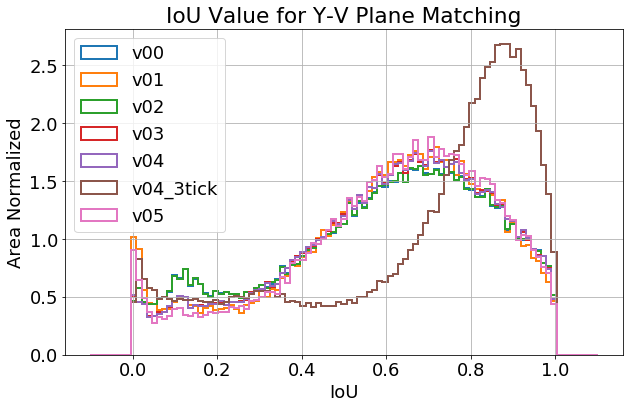

In [12]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)
plt.hist(df_Matching_v00['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v00',density=True)
plt.hist(df_Matching_v01['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v01',density=True)
plt.hist(df_Matching_v02['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v02',density=True)
plt.hist(df_Matching_v03['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v03',density=True)
plt.hist(df_Matching_v04['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04',density=True)
plt.hist(df_Matching_v04_3tick['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_3tick',density=True)
plt.hist(df_Matching_v05['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v05',density=True)
plt.title("IoU Value for Y-V Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

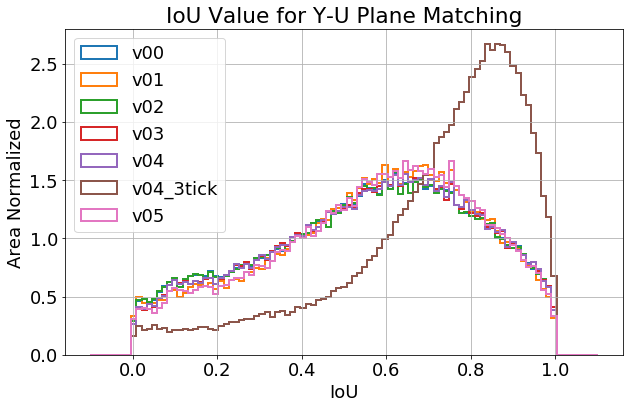

In [13]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)
plt.hist(df_Matching_v00['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v00',density=True)
plt.hist(df_Matching_v01['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v01',density=True)
plt.hist(df_Matching_v02['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v02',density=True)
plt.hist(df_Matching_v03['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v03',density=True)
plt.hist(df_Matching_v04['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04',density=True)
plt.hist(df_Matching_v04_3tick['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_3tick',density=True)
plt.hist(df_Matching_v05['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v05',density=True)
plt.title("IoU Value for Y-U Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

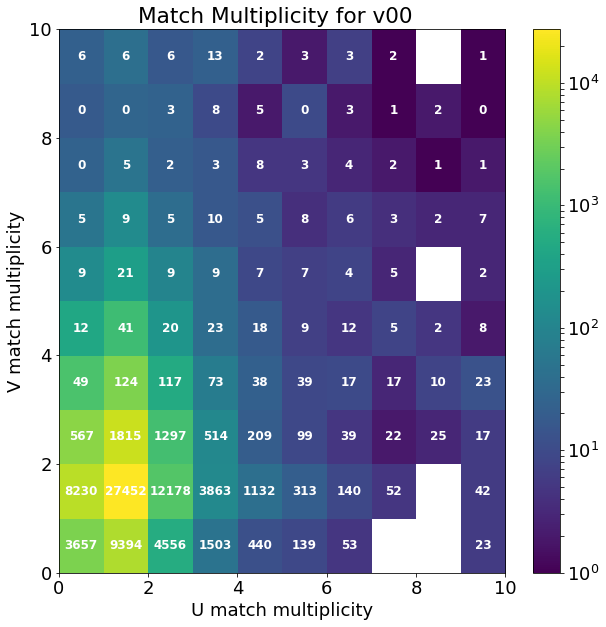

In [14]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v00['U_match_multiplicity'].values,df_Matching_v00['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v00  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
#fig.savefig('multi_v00.png', dpi=200)

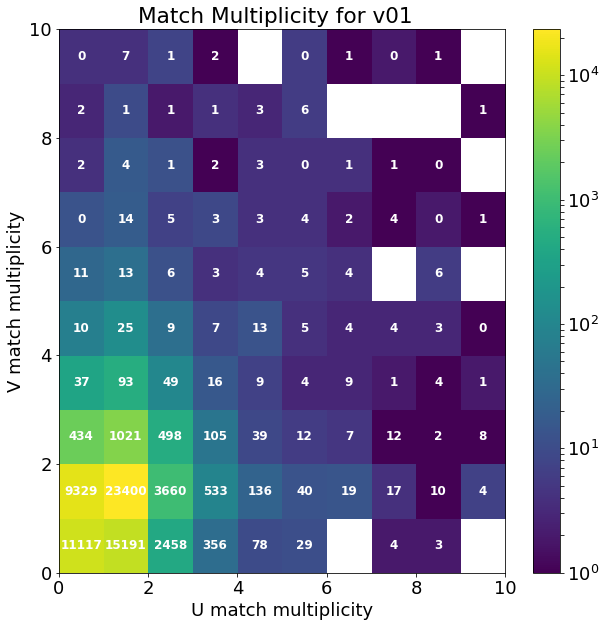

In [15]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v01['U_match_multiplicity'].values,df_Matching_v01['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v01  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
#fig.savefig('multi_v00.png', dpi=200)

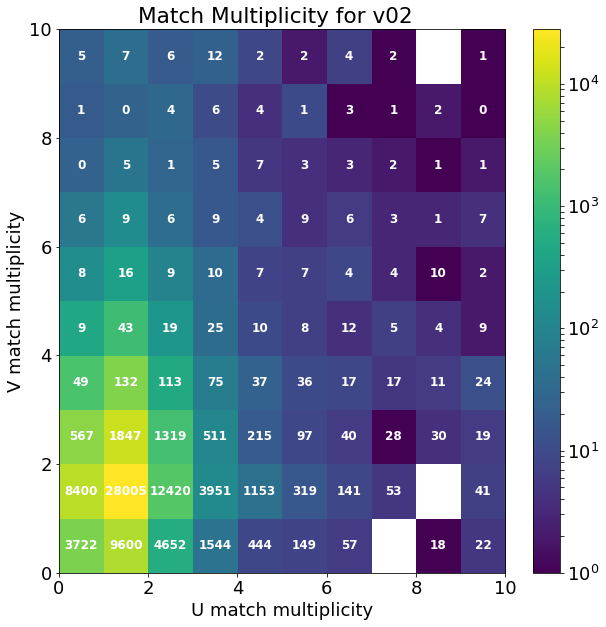

In [16]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v02['U_match_multiplicity'].values,df_Matching_v02['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v02  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
#fig.savefig('multi_v00.png', dpi=200)

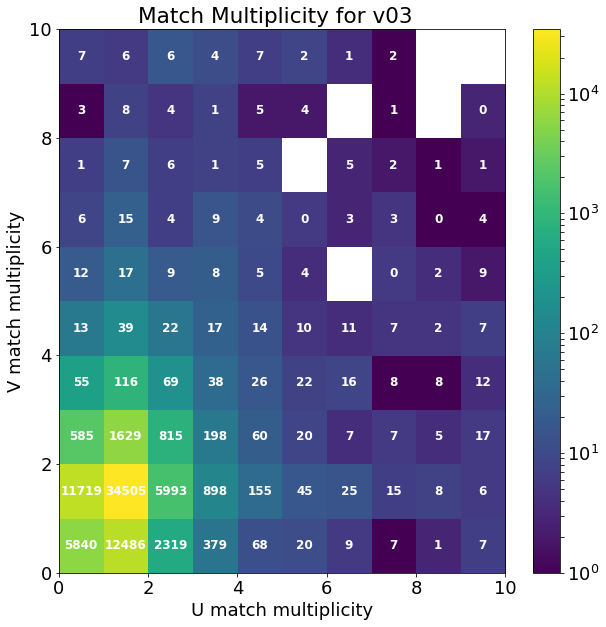

In [17]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v03['U_match_multiplicity'].values,df_Matching_v03['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v03  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
#fig.savefig('multi_v00.png', dpi=200)

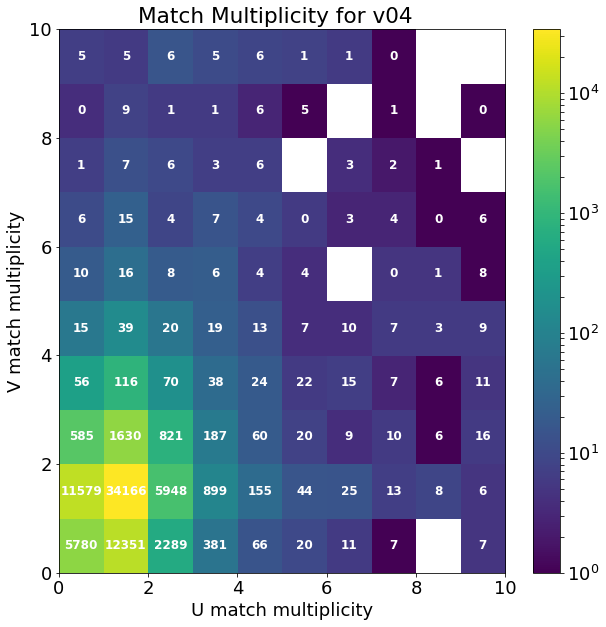

In [18]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v04['U_match_multiplicity'].values,df_Matching_v04['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v04  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
#fig.savefig('multi_v00.png', dpi=200)

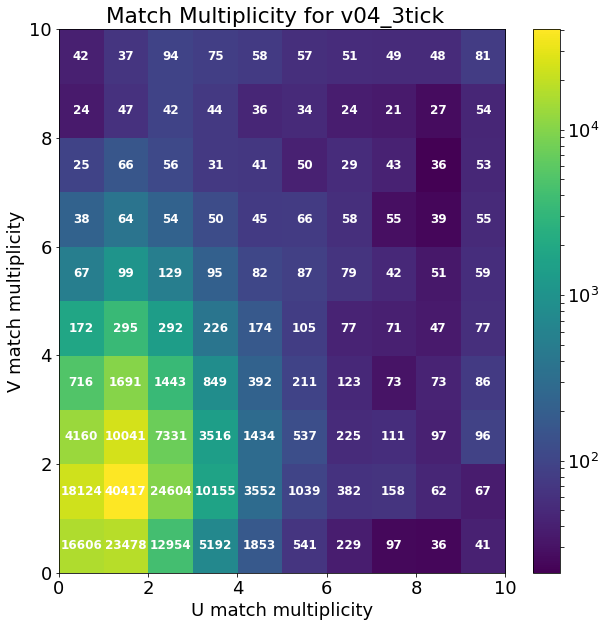

In [19]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v04_3tick['U_match_multiplicity'].values,df_Matching_v04_3tick['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v04_3tick  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
#fig.savefig('multi_v00.png', dpi=200)

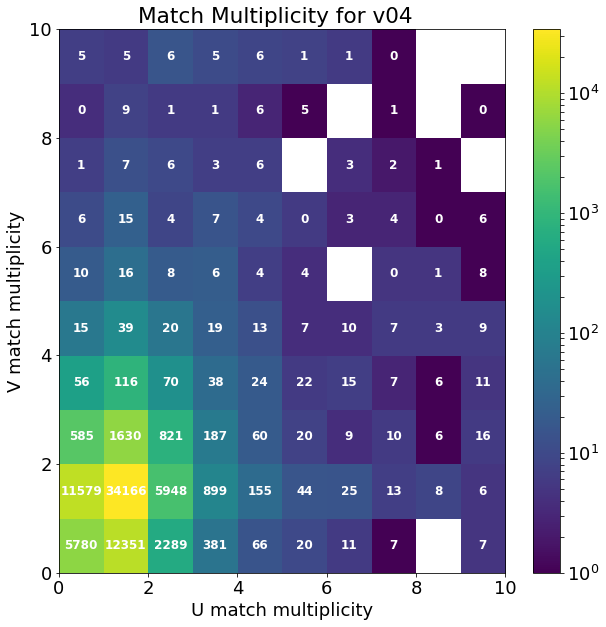

In [20]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v04['U_match_multiplicity'].values,df_Matching_v04['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v04  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
#fig.savefig('multi_v00.png', dpi=200)

In [21]:
df_Matching_v00_match=df_Matching_v00.query(MATCH_CUT)
df_Matching_v01_match=df_Matching_v01.query(MATCH_CUT)
df_Matching_v02_match=df_Matching_v02.query(MATCH_CUT)
df_Matching_v03_match=df_Matching_v03.query(MATCH_CUT)
df_Matching_v04_match=df_Matching_v04.query(MATCH_CUT)
df_Matching_v04_3tick_match=df_Matching_v04_3tick.query(MATCH_CUT)
df_Matching_v05_match=df_Matching_v05.query(MATCH_CUT)

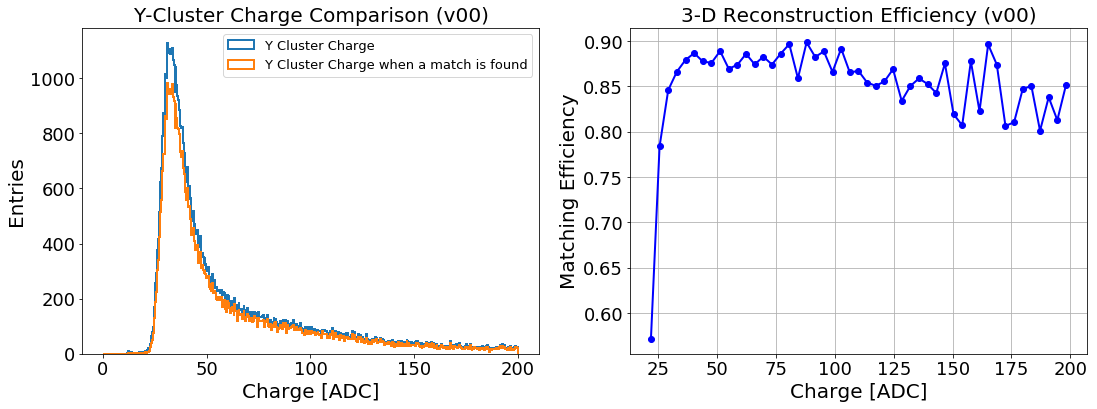

In [22]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v00['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v00_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v00)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v00, bins2D_v00 = np.histogram(df_Matching_v00['Y_cluster_charge'].values,bins=BINS)
vals3D_v00, bins3D_v00 = np.histogram(df_Matching_v00_match['Y_cluster_charge'].values,bins=BINS)
binC_v00 = 0.5*(bins2D_v00[1:]+bins2D_v00[:-1])
vals2D_v00 = vals2D_v00.astype(float)
#print vals2D
vals3D_v00 = vals3D_v00.astype(float)
ratio_v_v00 = []
for i,v in enumerate(vals2D_v00):
    if (v == 0):
        ratio_v_v00.append(0.)
    else:
        ratio_v_v00.append(vals3D_v00[i]/v)
#print ratio_v
plt.plot(binC_v00,ratio_v_v00,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v00)',fontsize=20)

plt.show()


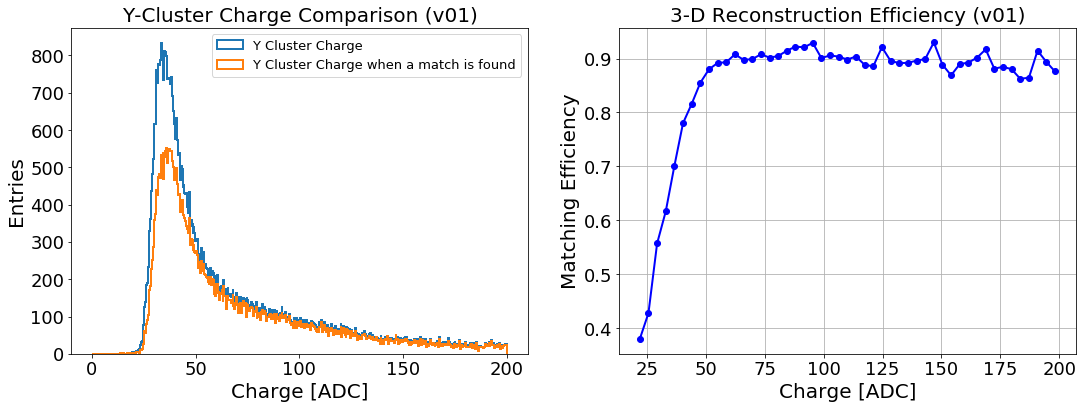

In [23]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v01['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v01_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v01)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v01, bins2D_v01 = np.histogram(df_Matching_v01['Y_cluster_charge'].values,bins=BINS)
vals3D_v01, bins3D_v01 = np.histogram(df_Matching_v01_match['Y_cluster_charge'].values,bins=BINS)
binC_v01 = 0.5*(bins2D_v01[1:]+bins2D_v00[:-1])
vals2D_v01 = vals2D_v01.astype(float)
#print vals2D
vals3D_v01 = vals3D_v01.astype(float)
ratio_v_v01 = []
for i,v in enumerate(vals2D_v01):
    if (v == 0):
        ratio_v_v01.append(0.)
    else:
        ratio_v_v01.append(vals3D_v01[i]/v)
#print ratio_v
plt.plot(binC_v01,ratio_v_v01,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v01)',fontsize=20)

plt.show()


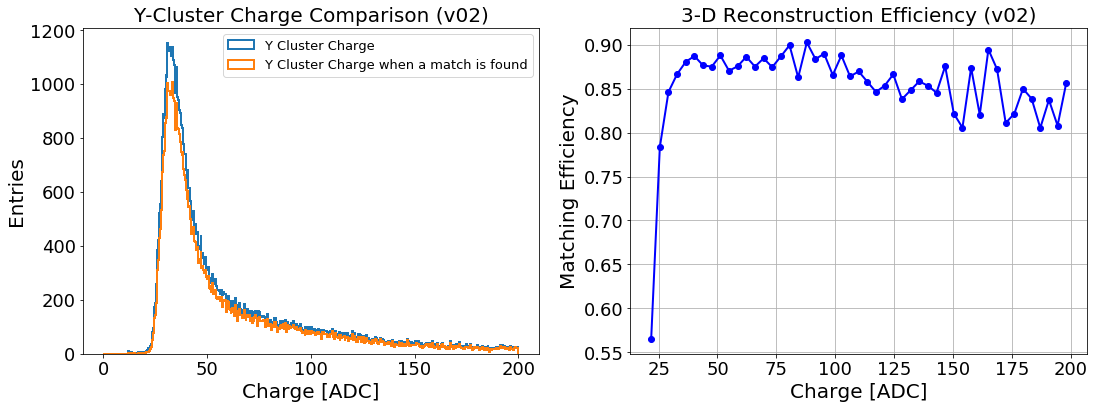

In [24]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v02['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v02_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v02)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v02, bins2D_v02 = np.histogram(df_Matching_v02['Y_cluster_charge'].values,bins=BINS)
vals3D_v02, bins3D_v02 = np.histogram(df_Matching_v02_match['Y_cluster_charge'].values,bins=BINS)
binC_v02 = 0.5*(bins2D_v02[1:]+bins2D_v02[:-1])
vals2D_v02 = vals2D_v02.astype(float)
#print vals2D
vals3D_v02 = vals3D_v02.astype(float)
ratio_v_v02 = []
for i,v in enumerate(vals2D_v02):
    if (v == 0):
        ratio_v_v02.append(0.)
    else:
        ratio_v_v02.append(vals3D_v02[i]/v)
#print ratio_v
plt.plot(binC_v02,ratio_v_v02,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v02)',fontsize=20)

plt.show()


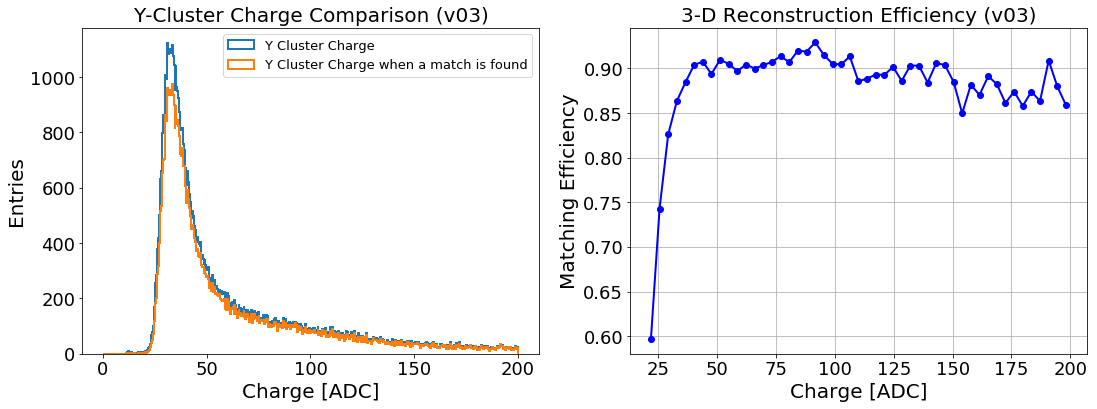

In [25]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v03['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v03_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v03)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v03, bins2D_v03 = np.histogram(df_Matching_v03['Y_cluster_charge'].values,bins=BINS)
vals3D_v03, bins3D_v03 = np.histogram(df_Matching_v03_match['Y_cluster_charge'].values,bins=BINS)
binC_v03 = 0.5*(bins2D_v03[1:]+bins2D_v03[:-1])
vals2D_v03 = vals2D_v03.astype(float)
#print vals2D
vals3D_v03 = vals3D_v03.astype(float)
ratio_v_v03 = []
for i,v in enumerate(vals2D_v03):
    if (v == 0):
        ratio_v_v03.append(0.)
    else:
        ratio_v_v03.append(vals3D_v03[i]/v)
#print ratio_v
plt.plot(binC_v03,ratio_v_v03,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v03)',fontsize=20)

plt.show()


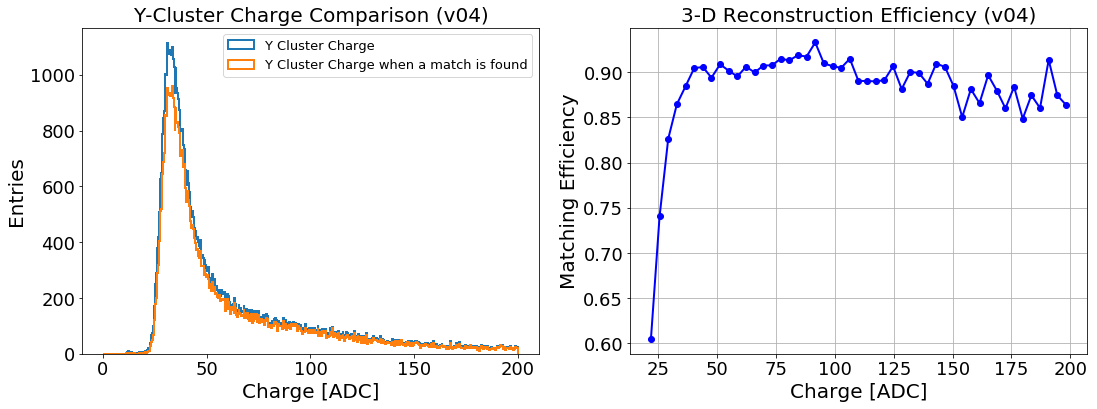

In [26]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v04['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v04_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v04)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v04, bins2D_v04 = np.histogram(df_Matching_v04['Y_cluster_charge'].values,bins=BINS)
vals3D_v04, bins3D_v04 = np.histogram(df_Matching_v04_match['Y_cluster_charge'].values,bins=BINS)
binC_v04 = 0.5*(bins2D_v04[1:]+bins2D_v04[:-1])
vals2D_v04 = vals2D_v04.astype(float)
#print vals2D
vals3D_v04 = vals3D_v04.astype(float)
ratio_v_v04 = []
for i,v in enumerate(vals2D_v04):
    if (v == 0):
        ratio_v_v04.append(0.)
    else:
        ratio_v_v04.append(vals3D_v04[i]/v)
#print ratio_v
plt.plot(binC_v04,ratio_v_v04,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04)',fontsize=20)

plt.show()


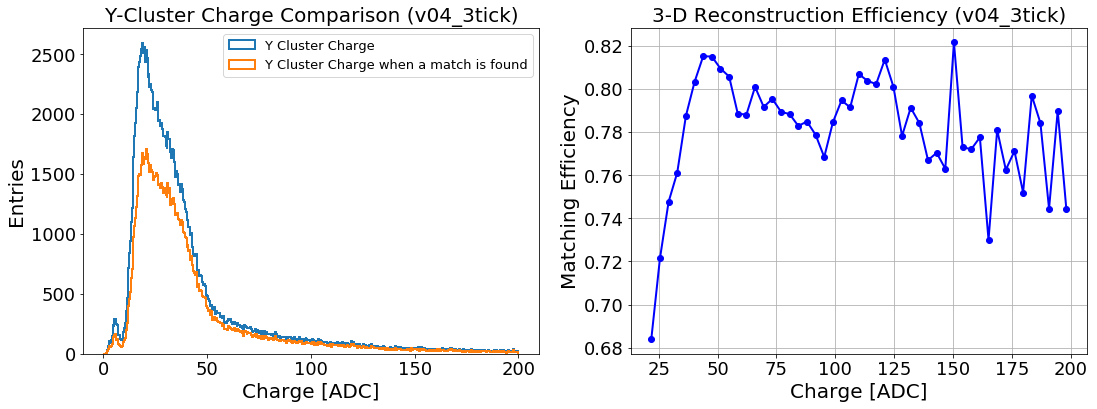

In [27]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v04_3tick['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v04_3tick_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v04_3tick)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v04_3tick, bins2D_v04_3tick = np.histogram(df_Matching_v04_3tick['Y_cluster_charge'].values,bins=BINS)
vals3D_v04_3tick, bins3D_v04_3tick = np.histogram(df_Matching_v04_3tick_match['Y_cluster_charge'].values,bins=BINS)
binC_v04_3tick = 0.5*(bins2D_v04_3tick[1:]+bins2D_v04_3tick[:-1])
vals2D_v04_3tick = vals2D_v04_3tick.astype(float)
#print vals2D
vals3D_v04_3tick = vals3D_v04_3tick.astype(float)
ratio_v_v04_3tick = []
for i,v in enumerate(vals2D_v04_3tick):
    if (v == 0):
        ratio_v_v04_3tick.append(0.)
    else:
        ratio_v_v04_3tick.append(vals3D_v04_3tick[i]/v)
#print ratio_v
plt.plot(binC_v04_3tick,ratio_v_v04_3tick,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_3tick)',fontsize=20)

plt.show()


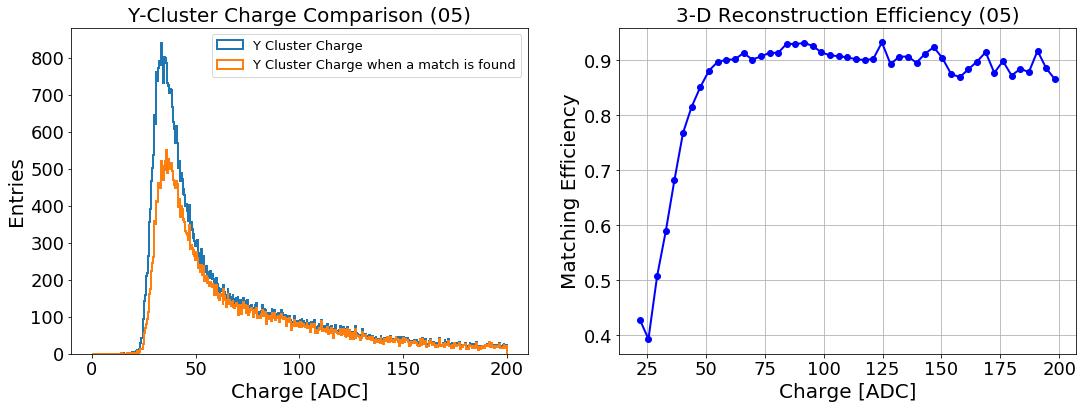

In [28]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v05['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v05_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (05)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_05, bins2D_05 = np.histogram(df_Matching_v05['Y_cluster_charge'].values,bins=BINS)
vals3D_05, bins3D_05 = np.histogram(df_Matching_v05_match['Y_cluster_charge'].values,bins=BINS)
binC_05 = 0.5*(bins2D_05[1:]+bins2D_05[:-1])
vals2D_05 = vals2D_05.astype(float)
#print vals2D
vals3D_05 = vals3D_05.astype(float)
ratio_v_05 = []
for i,v in enumerate(vals2D_05):
    if (v == 0):
        ratio_v_05.append(0.)
    else:
        ratio_v_05.append(vals3D_05[i]/v)
#print ratio_v
plt.plot(binC_05,ratio_v_05,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (05)',fontsize=20)

plt.show()


In [29]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

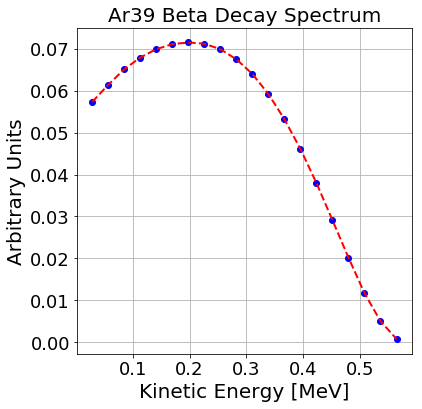

In [30]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

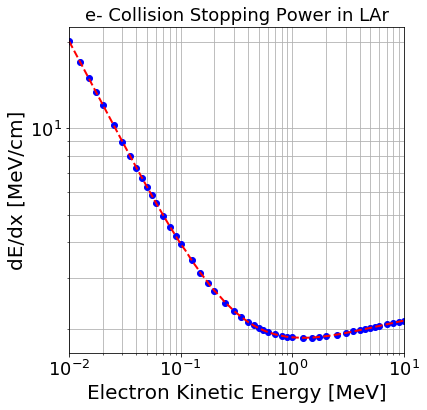

In [31]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

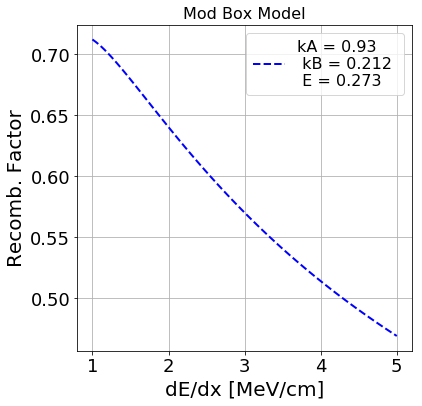

In [32]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

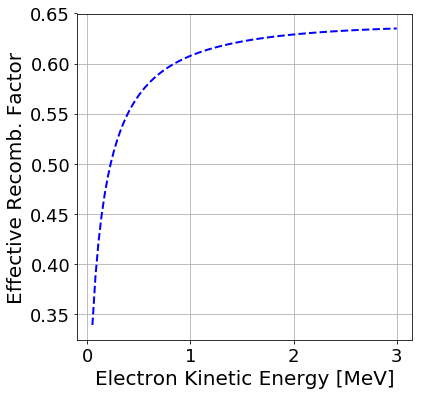

In [33]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



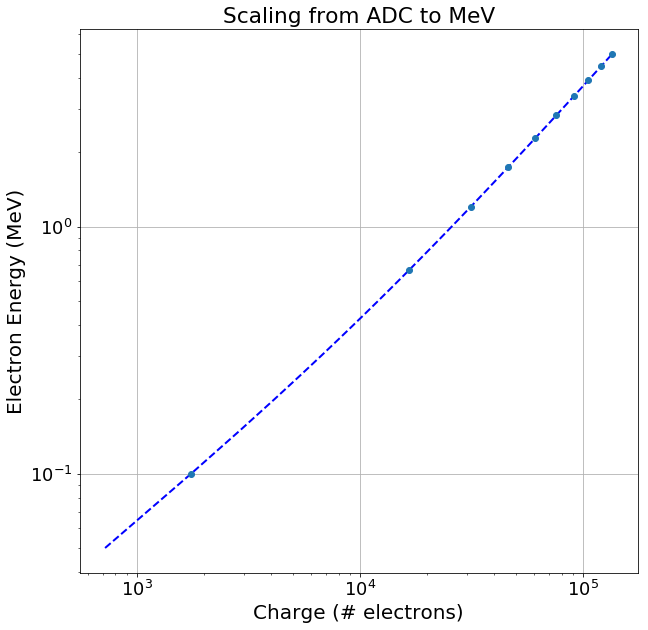

In [34]:
fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.05,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)

In [35]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.238623608659


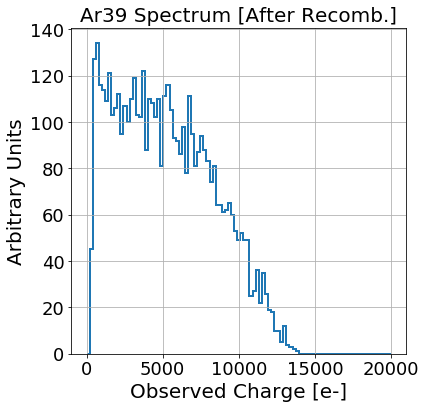

In [36]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [37]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

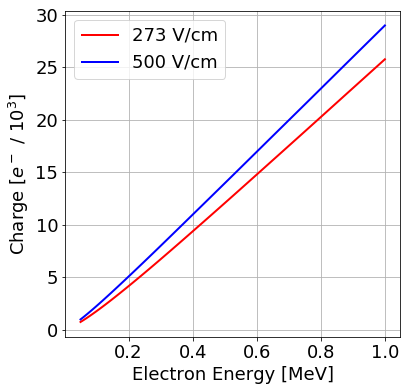

In [38]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [39]:
def E_recoY_v00(df,gain):
    YQ_v00 = df['Y_cluster_charge']
    QrecoY_v00 = YQ_v00 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v00 = fQ2E(QrecoY_v00)
    return ErecoY_v00


def E_recoU_v00(df,gain):
    UQ_v00 = df['U_cluster_charge']
    QrecoU_v00 = UQ_v00 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v00 = fQ2E(QrecoU_v00)
    return ErecoU_v00



def E_recoV_v00(df,gain):
    VQ_v00 = df['V_cluster_charge']
    QrecoV_v00 = VQ_v00 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v00 = fQ2E(QrecoV_v00)
    return ErecoV_v00


def E_recoY_v01(df,gain):
    YQ_v01 = df['Y_cluster_charge']
    QrecoY_v01 = YQ_v01 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v01 = fQ2E(QrecoY_v01)
    return ErecoY_v01


def E_recoU_v01(df,gain):
    UQ_v01 = df['U_cluster_charge']
    QrecoU_v01 = UQ_v01 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v01 = fQ2E(QrecoU_v01)
    return ErecoU_v01



def E_recoV_v01(df,gain):
    VQ_v01 = df['V_cluster_charge']
    QrecoV_v01 = VQ_v01 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v01 = fQ2E(QrecoV_v01)
    return ErecoV_v01


def E_recoY_v02(df,gain):
    YQ_v02 = df['Y_cluster_charge']
    QrecoY_v02 = YQ_v02 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v02 = fQ2E(QrecoY_v02)
    return ErecoY_v02


def E_recoU_v02(df,gain):
    UQ_v02 = df['U_cluster_charge']
    QrecoU_v02 = UQ_v02 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v02 = fQ2E(QrecoU_v02)
    return ErecoU_v02



def E_recoV_v02(df,gain):
    VQ_v02 = df['V_cluster_charge']
    QrecoV_v02 = VQ_v02 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v02 = fQ2E(QrecoV_v02)
    return ErecoV_v02



def E_recoY_v03(df,gain):
    YQ_v03 = df['Y_cluster_charge']
    QrecoY_v03 = YQ_v03 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v03 = fQ2E(QrecoY_v03)
    return ErecoY_v03


def E_recoU_v03(df,gain):
    UQ_v03 = df['U_cluster_charge']
    QrecoU_v03 = UQ_v03 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v03 = fQ2E(QrecoU_v03)
    return ErecoU_v03



def E_recoV_v03(df,gain):
    VQ_v03 = df['V_cluster_charge']
    QrecoV_v03 = VQ_v03 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v03 = fQ2E(QrecoV_v03)
    return ErecoV_v03



def E_recoY_v04(df,gain):
    YQ_v04 = df['Y_cluster_charge']
    QrecoY_v04 = YQ_v04 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v04 = fQ2E(QrecoY_v04)
    return ErecoY_v04


def E_recoU_v04(df,gain):
    UQ_v04 = df['U_cluster_charge']
    QrecoU_v04 = UQ_v04 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v04 = fQ2E(QrecoU_v04)
    return ErecoU_v04



def E_recoV_v04(df,gain):
    VQ_v04 = df['V_cluster_charge']
    QrecoV_v04 = VQ_v04 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v04 = fQ2E(QrecoV_v04)
    return ErecoV_v04



def E_recoY_v04_3tick(df,gain):
    YQ_v04_3tick = df['Y_cluster_charge']
    QrecoY_v04_3tick = YQ_v04_3tick * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v04_3tick = fQ2E(QrecoY_v04_3tick)
    return ErecoY_v04_3tick


def E_recoU_v04_3tick(df,gain):
    UQ_v04_3tick = df['U_cluster_charge']
    QrecoU_v04_3tick = UQ_v04_3tick * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v04_3tick = fQ2E(QrecoU_v04_3tick)
    return ErecoU_v04_3tick



def E_recoV_v04_3tick(df,gain):
    VQ_v04_3tick = df['V_cluster_charge']
    QrecoV_v04_3tick = VQ_v04_3tick * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v04_3tick = fQ2E(QrecoV_v04_3tick)
    return ErecoV_v04_3tick



def E_recoY_v05(df,gain):
    YQ_v05 = df['Y_cluster_charge']
    QrecoY_v05 = YQ_v05 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v05 = fQ2E(QrecoY_v05)
    return ErecoY_v05


def E_recoU_v05(df,gain):
    UQ_v05 = df['U_cluster_charge']
    QrecoU_v05 = UQ_v05 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v05 = fQ2E(QrecoU_v05)
    return ErecoU_v05



def E_recoV_v05(df,gain):
    VQ_v05 = df['V_cluster_charge']
    QrecoV_v05 = VQ_v05 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v05 = fQ2E(QrecoV_v05)
    return ErecoV_v05

In [40]:
dfcut_match_v00 = df_Matching_v00_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v00   = df_Matching_v00.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v00['energy'] = E_recoY_v00(dfcut_match_v00,238.4)
dfcut_all_v00['energy']   = E_recoY_v00(dfcut_all_v00,238.4)


dfcut_match_v01 = df_Matching_v01_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v01   = df_Matching_v01.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v01['energy'] = E_recoY_v01(dfcut_match_v01,238.4)
dfcut_all_v01['energy']   = E_recoY_v01(dfcut_all_v01,238.4)


dfcut_match_v02 = df_Matching_v02_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v02   = df_Matching_v02.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v02['energy'] = E_recoY_v02(dfcut_match_v02,238.4)
dfcut_all_v02['energy']   = E_recoY_v02(dfcut_all_v02,238.4)


dfcut_match_v03 = df_Matching_v03_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v03   = df_Matching_v03.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v03['energy'] = E_recoY_v03(dfcut_match_v03,238.4)
dfcut_all_v03['energy']   = E_recoY_v03(dfcut_all_v03,238.4)


dfcut_match_v04 = df_Matching_v04_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v04   = df_Matching_v04.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v04['energy'] = E_recoY_v04(dfcut_match_v04,238.4)
dfcut_all_v04['energy']   = E_recoY_v04(dfcut_all_v04,238.4)

dfcut_match_v04_3tick = df_Matching_v04_3tick_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v04_3tick   = df_Matching_v04_3tick.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v04_3tick['energy'] = E_recoY_v04_3tick(dfcut_match_v04_3tick,238.4)
dfcut_all_v04_3tick['energy']   = E_recoY_v04_3tick(dfcut_all_v04_3tick,238.4)


dfcut_match_v05 = df_Matching_v05_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v05   = df_Matching_v05.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v05['energy'] = E_recoY_v05(dfcut_match_v05,238.4)
dfcut_all_v05['energy']   = E_recoY_v05(dfcut_all_v05,238.4)


/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

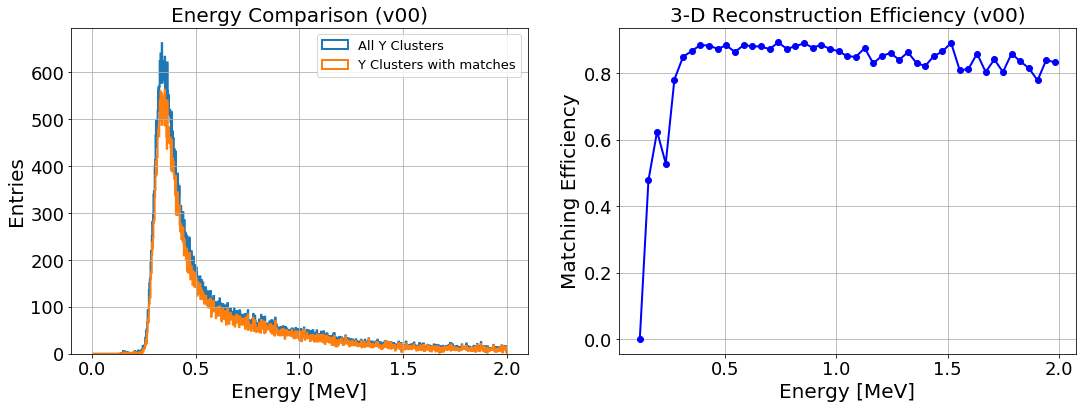

In [41]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v00['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v00['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v00)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v00, bins2D_v00 = np.histogram(dfcut_all_v00['energy'].values,bins=BINS)
vals3D_v00, bins3D_v00 = np.histogram(dfcut_match_v00['energy'].values,bins=BINS)
binC_v00 = 0.5*(bins2D_v00[1:]+bins2D_v00[:-1])
vals2D_v00 = vals2D_v00.astype(float)
#print vals2D
vals3D_v00 = vals3D_v00.astype(float)
ratio_v_v00 = []
for i,v in enumerate(vals2D_v00):
    if (v == 0):
        ratio_v_v00.append(0.)
    else:
        ratio_v_v00.append(vals3D_v00[i]/v)
#print ratio_v
plt.plot(binC_v00,ratio_v_v00,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v00)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
#print dfcut_match_v00.shape[0]

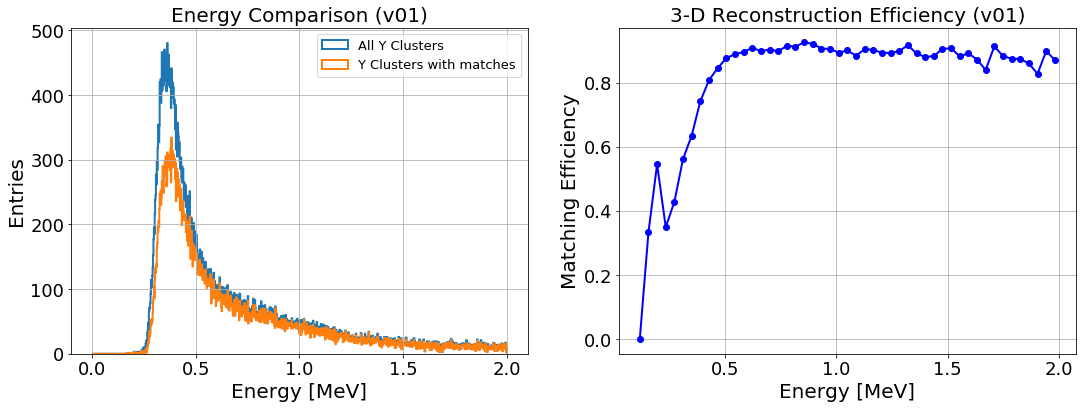

In [42]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v01['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v01['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v01)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v01, bins2D_v01 = np.histogram(dfcut_all_v01['energy'].values,bins=BINS)
vals3D_v01, bins3D_v01 = np.histogram(dfcut_match_v01['energy'].values,bins=BINS)
binC_v01 = 0.5*(bins2D_v01[1:]+bins2D_v01[:-1])
vals2D_v01 = vals2D_v01.astype(float)
#print vals2D
vals3D_v01 = vals3D_v01.astype(float)
ratio_v_v01 = []
for i,v in enumerate(vals2D_v01):
    if (v == 0):
        ratio_v_v01.append(0.)
    else:
        ratio_v_v01.append(vals3D_v01[i]/v)
#print ratio_v
plt.plot(binC_v01,ratio_v_v01,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v01)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
#print dfcut_match_v00.shape[0]

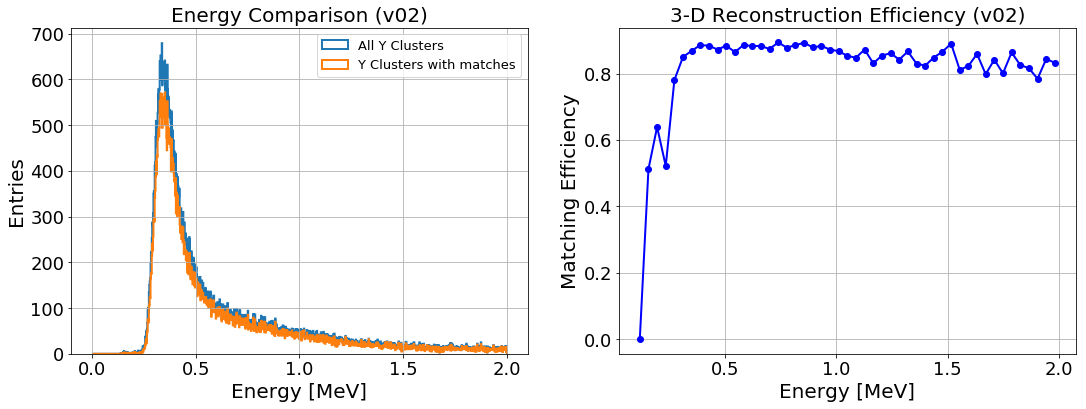

In [43]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v02['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v02['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v02)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v02, bins2D_v02 = np.histogram(dfcut_all_v02['energy'].values,bins=BINS)
vals3D_v02, bins3D_v02 = np.histogram(dfcut_match_v02['energy'].values,bins=BINS)
binC_v02 = 0.5*(bins2D_v02[1:]+bins2D_v02[:-1])
vals2D_v02 = vals2D_v02.astype(float)
#print vals2D
vals3D_v02 = vals3D_v02.astype(float)
ratio_v_v02 = []
for i,v in enumerate(vals2D_v02):
    if (v == 0):
        ratio_v_v02.append(0.)
    else:
        ratio_v_v02.append(vals3D_v02[i]/v)
#print ratio_v
plt.plot(binC_v02,ratio_v_v02,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v02)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
#print dfcut_match_v00.shape[0]

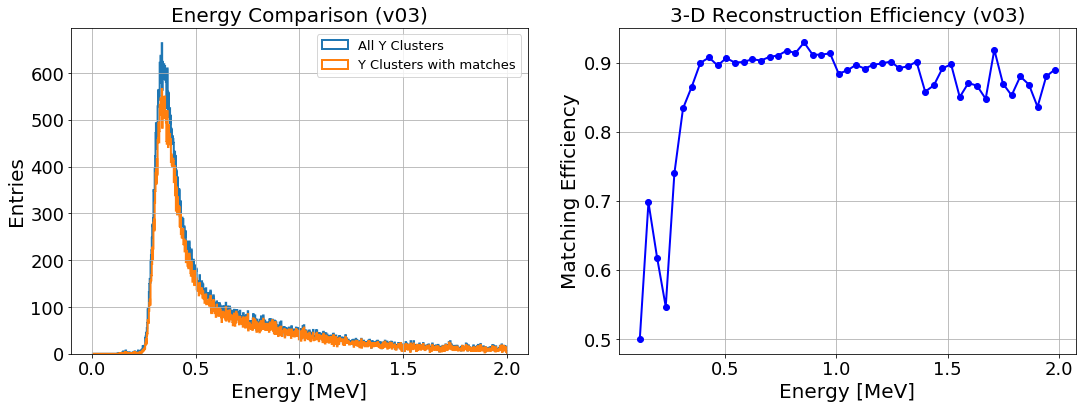

In [44]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v03['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v03['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v03)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v03, bins2D_v03 = np.histogram(dfcut_all_v03['energy'].values,bins=BINS)
vals3D_v03, bins3D_v03 = np.histogram(dfcut_match_v03['energy'].values,bins=BINS)
binC_v03 = 0.5*(bins2D_v03[1:]+bins2D_v03[:-1])
vals2D_v03 = vals2D_v03.astype(float)
#print vals2D
vals3D_v03 = vals3D_v03.astype(float)
ratio_v_v03 = []
for i,v in enumerate(vals2D_v03):
    if (v == 0):
        ratio_v_v03.append(0.)
    else:
        ratio_v_v03.append(vals3D_v03[i]/v)
#print ratio_v
plt.plot(binC_v03,ratio_v_v03,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v03)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
#print dfcut_match_v00.shape[0]

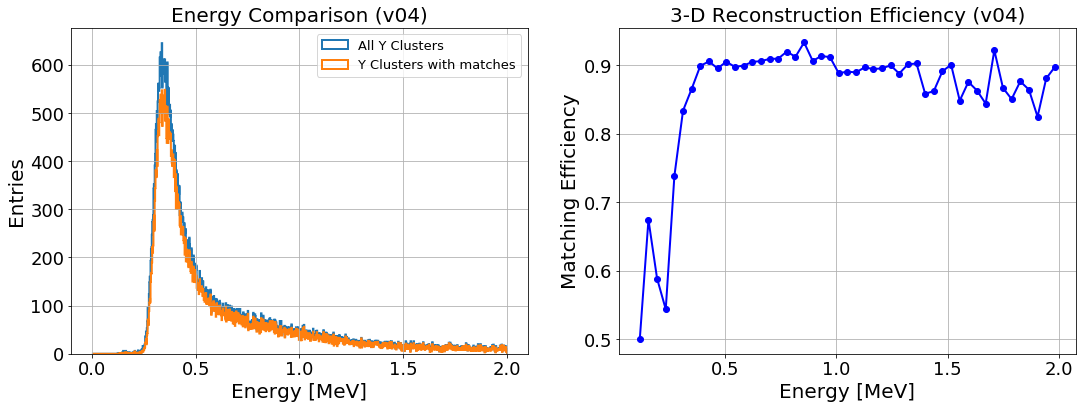

In [45]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v04['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v04['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v04)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v04, bins2D_v04 = np.histogram(dfcut_all_v04['energy'].values,bins=BINS)
vals3D_v04, bins3D_v04 = np.histogram(dfcut_match_v04['energy'].values,bins=BINS)
binC_v04 = 0.5*(bins2D_v04[1:]+bins2D_v04[:-1])
vals2D_v04 = vals2D_v04.astype(float)
#print vals2D
vals3D_v04 = vals3D_v04.astype(float)
ratio_v_v04 = []
for i,v in enumerate(vals2D_v04):
    if (v == 0):
        ratio_v_v04.append(0.)
    else:
        ratio_v_v04.append(vals3D_v04[i]/v)
#print ratio_v
plt.plot(binC_v04,ratio_v_v04,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
#print dfcut_match_v00.shape[0]

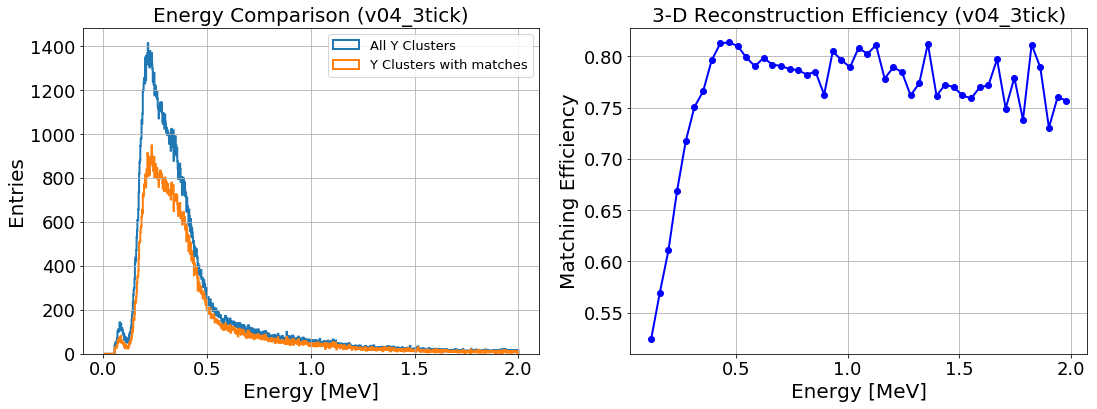

In [46]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v04_3tick['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v04_3tick['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v04_3tick)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v04_3tick, bins2D_v04_3tick = np.histogram(dfcut_all_v04_3tick['energy'].values,bins=BINS)
vals3D_v04_3tick, bins3D_v04_3tick = np.histogram(dfcut_match_v04_3tick['energy'].values,bins=BINS)
binC_v04_3tick = 0.5*(bins2D_v04_3tick[1:]+bins2D_v04_3tick[:-1])
vals2D_v04_3tick = vals2D_v04_3tick.astype(float)
#print vals2D
vals3D_v04_3tick = vals3D_v04_3tick.astype(float)
ratio_v_v04_3tick = []
for i,v in enumerate(vals2D_v04_3tick):
    if (v == 0):
        ratio_v_v04_3tick.append(0.)
    else:
        ratio_v_v04_3tick.append(vals3D_v04_3tick[i]/v)
#print ratio_v
plt.plot(binC_v04_3tick,ratio_v_v04_3tick,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_3tick)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
#print dfcut_match_v00.shape[0]

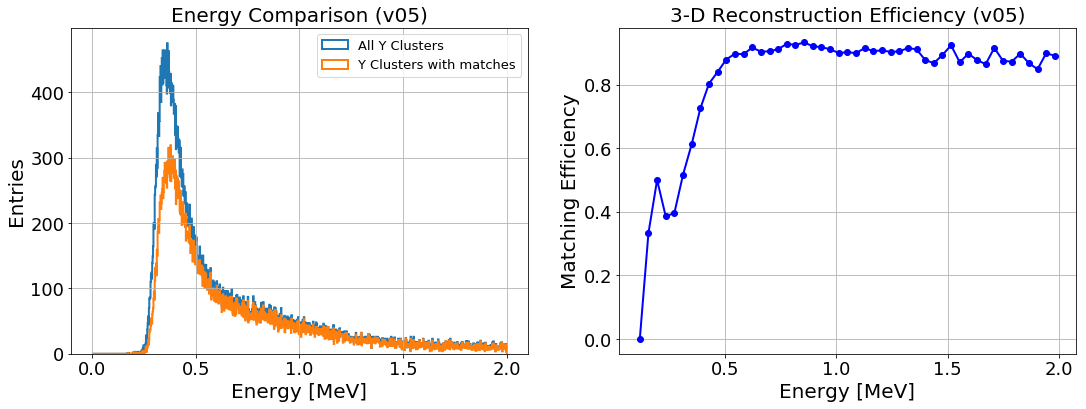

In [47]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v05['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v05['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v05)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v05, bins2D_v05 = np.histogram(dfcut_all_v05['energy'].values,bins=BINS)
vals3D_v05, bins3D_v05 = np.histogram(dfcut_match_v05['energy'].values,bins=BINS)
binC_v05 = 0.5*(bins2D_v05[1:]+bins2D_v05[:-1])
vals2D_v05 = vals2D_v05.astype(float)
#print vals2D
vals3D_v05 = vals3D_v05.astype(float)
ratio_v_v05 = []
for i,v in enumerate(vals2D_v05):
    if (v == 0):
        ratio_v_v05.append(0.)
    else:
        ratio_v_v05.append(vals3D_v05[i]/v)
#print ratio_v
plt.plot(binC_v05,ratio_v_v05,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v05)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
#print dfcut_match_v00.shape[0]

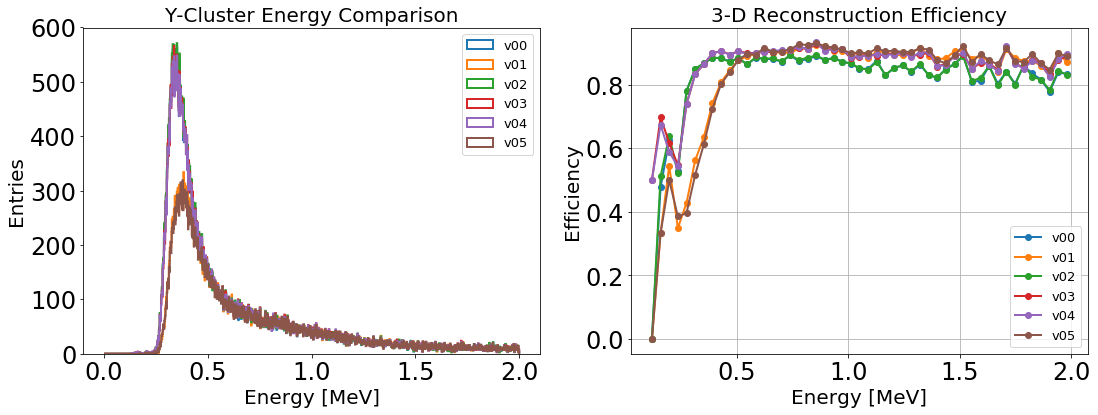

In [61]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)

plt.hist(dfcut_match_v00['energy'].values, bins=BINS,histtype='step',lw=2,label='v00')
plt.hist(dfcut_match_v01['energy'].values, bins=BINS,histtype='step',lw=2,label='v01')
plt.hist(dfcut_match_v02['energy'].values, bins=BINS,histtype='step',lw=2,label='v02')
plt.hist(dfcut_match_v03['energy'].values, bins=BINS,histtype='step',lw=2,label='v03')
plt.hist(dfcut_match_v04['energy'].values, bins=BINS,histtype='step',lw=2,label='v04')
# plt.hist(dfcut_match_v04_3tick['energy'].values, bins=BINS,histtype='step',lw=2,label='v04_3tick')
plt.hist(dfcut_match_v05['energy'].values, bins=BINS,histtype='step',lw=2,label='v05')

plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Energy Comparison',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)




plt.plot(binC_v00,ratio_v_v00,'o-',lw=2,label='v00')
plt.plot(binC_v01,ratio_v_v01,'o-',lw=2,label='v01')
plt.plot(binC_v02,ratio_v_v02,'o-',lw=2,label='v02')
plt.plot(binC_v03,ratio_v_v03,'o-',lw=2,label='v03')
plt.plot(binC_v04,ratio_v_v04,'o-',lw=2,label='v04')
# plt.plot(binC_v04_3tick,ratio_v_v04_3tick,'o-',lw=2,label='v04_3tick')
plt.plot(binC_v05,ratio_v_v05,'o-',lw=2,label='v05')




plt.grid()
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency',fontsize=20)
plt.legend(loc=4,fontsize=13)
plt.show()
fig.savefig('Threshold_plot_1tick_v04.png', dpi=300)



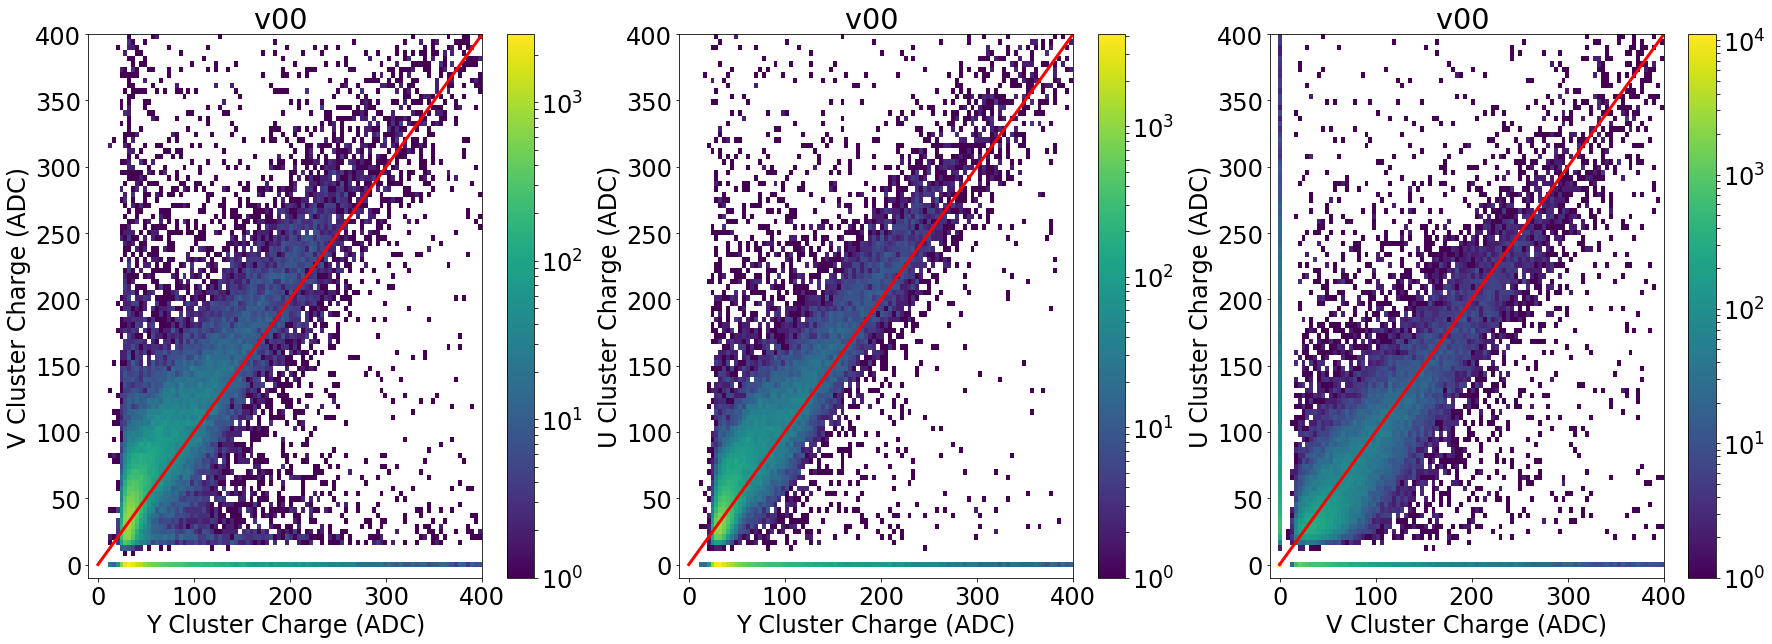

In [62]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v00['Y_cluster_charge'].values,df_Matching_v00['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v00 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v00['Y_cluster_charge'].values,df_Matching_v00['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v00 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v00['V_cluster_charge'].values,df_Matching_v00['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v00 ')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

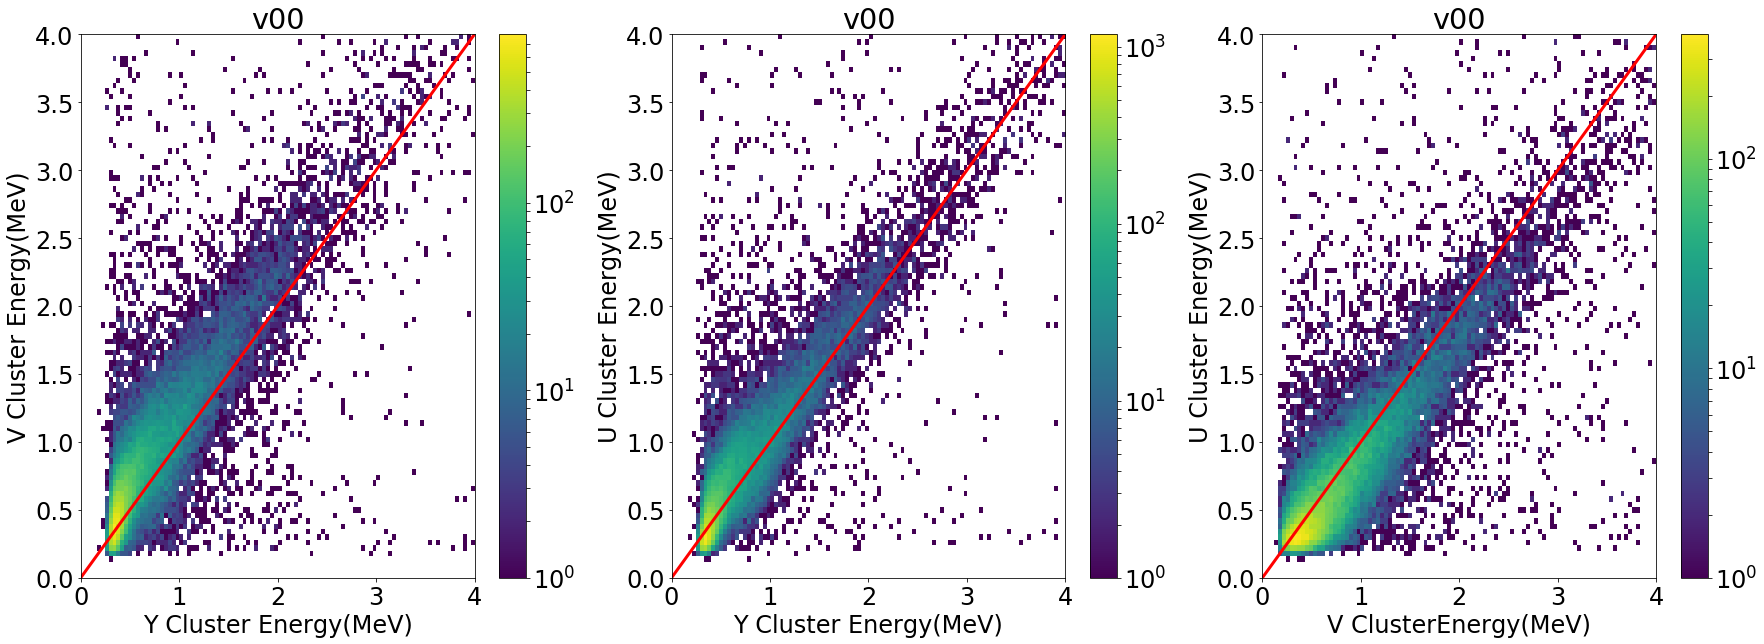

In [63]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge > 10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge >10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v00 = df_Matching_v00.query(CUT)

dfChargeCut_v00['energyY_v00'] = E_recoY_v00(dfChargeCut_v00,238.4)
dfChargeCut_v00['energyU_v00'] = E_recoU_v00(dfChargeCut_v00,232)
dfChargeCut_v00['energyV_v00'] = E_recoV_v00(dfChargeCut_v00,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v00['energyY_v00'].values,dfChargeCut_v00['energyV_v00'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v00')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v00['energyY_v00'].values,dfChargeCut_v00['energyU_v00'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v00')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v00['energyV_v00'].values,dfChargeCut_v00['energyU_v00'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v00')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

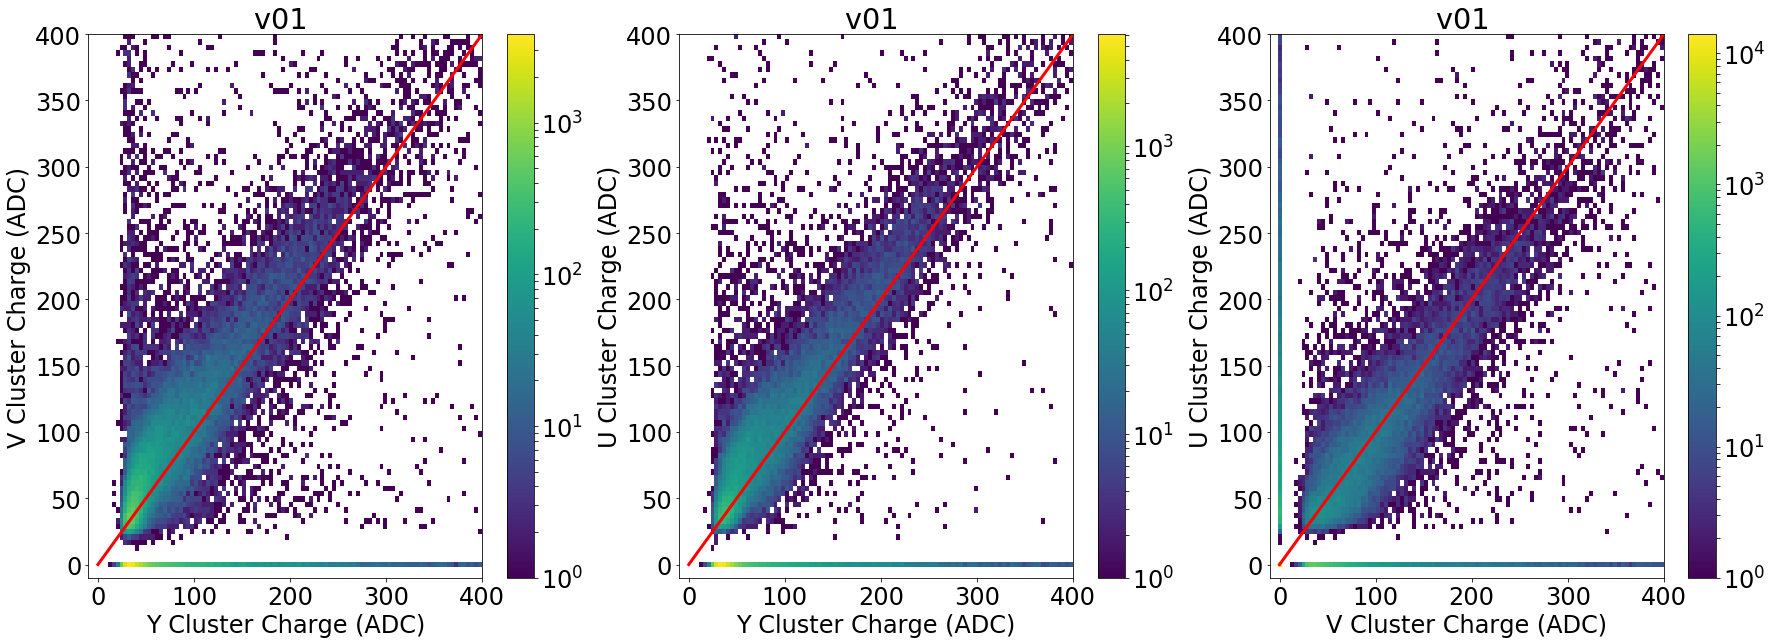

In [64]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v01['Y_cluster_charge'].values,df_Matching_v01['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v01 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v01['Y_cluster_charge'].values,df_Matching_v01['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v01 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v01['V_cluster_charge'].values,df_Matching_v01['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v01 ')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

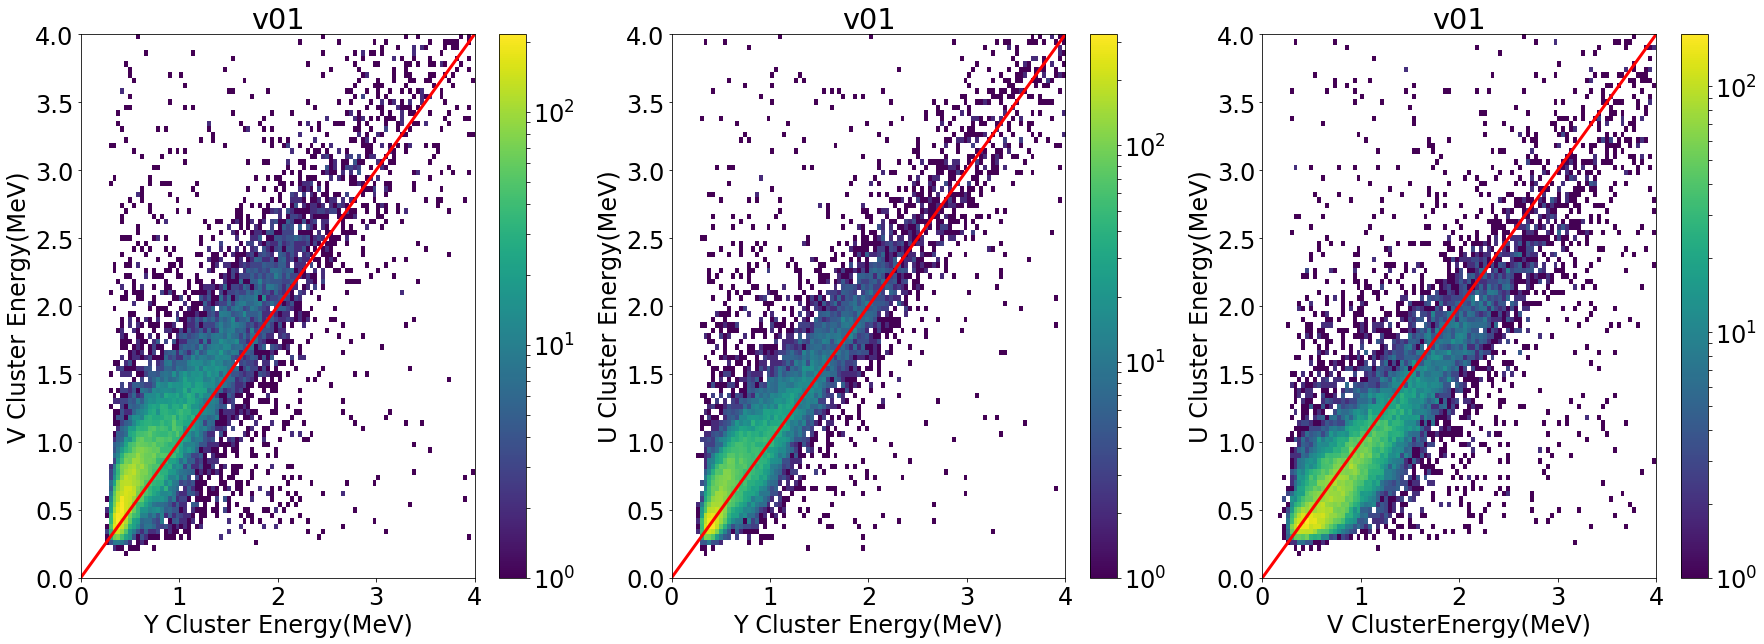

In [65]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge > 10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge >10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v01 = df_Matching_v01.query(CUT)

dfChargeCut_v01['energyY_v01'] = E_recoY_v01(dfChargeCut_v01,238.4)
dfChargeCut_v01['energyU_v01'] = E_recoU_v01(dfChargeCut_v01,232)
dfChargeCut_v01['energyV_v01'] = E_recoV_v01(dfChargeCut_v01,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v01['energyY_v01'].values,dfChargeCut_v01['energyV_v01'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v01')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v01['energyY_v01'].values,dfChargeCut_v01['energyU_v01'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v01')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v01['energyV_v01'].values,dfChargeCut_v01['energyU_v01'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v01')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

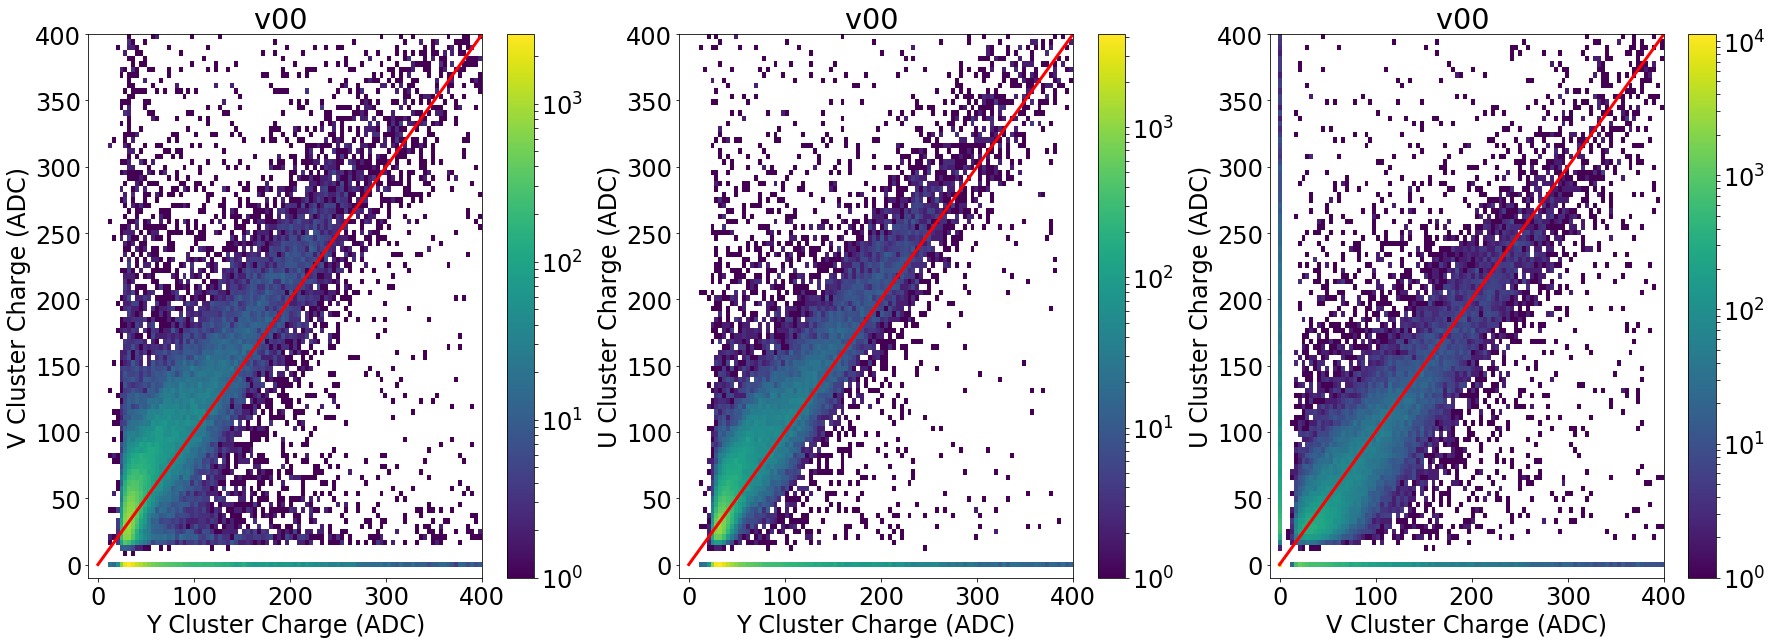

In [66]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v02['Y_cluster_charge'].values,df_Matching_v02['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v00 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v02['Y_cluster_charge'].values,df_Matching_v02['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v00 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v02['V_cluster_charge'].values,df_Matching_v02['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v00 ')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

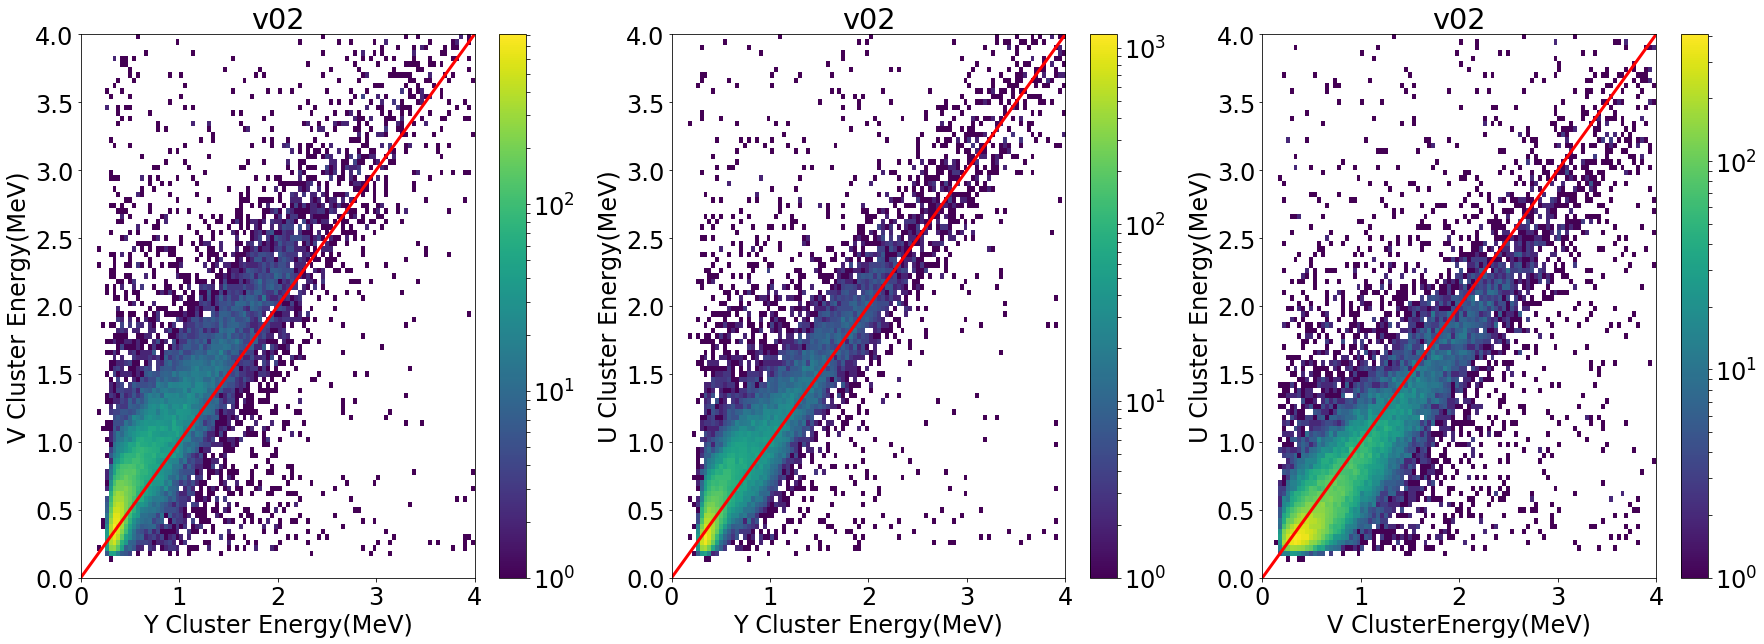

In [67]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge > 10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge >10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v02 = df_Matching_v02.query(CUT)

dfChargeCut_v02['energyY_v02'] = E_recoY_v02(dfChargeCut_v02,238.4)
dfChargeCut_v02['energyU_v02'] = E_recoU_v02(dfChargeCut_v02,232)
dfChargeCut_v02['energyV_v02'] = E_recoV_v02(dfChargeCut_v02,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v02['energyY_v02'].values,dfChargeCut_v02['energyV_v02'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v02')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v02['energyY_v02'].values,dfChargeCut_v02['energyU_v02'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v02')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v02['energyV_v02'].values,dfChargeCut_v02['energyU_v02'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v02')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

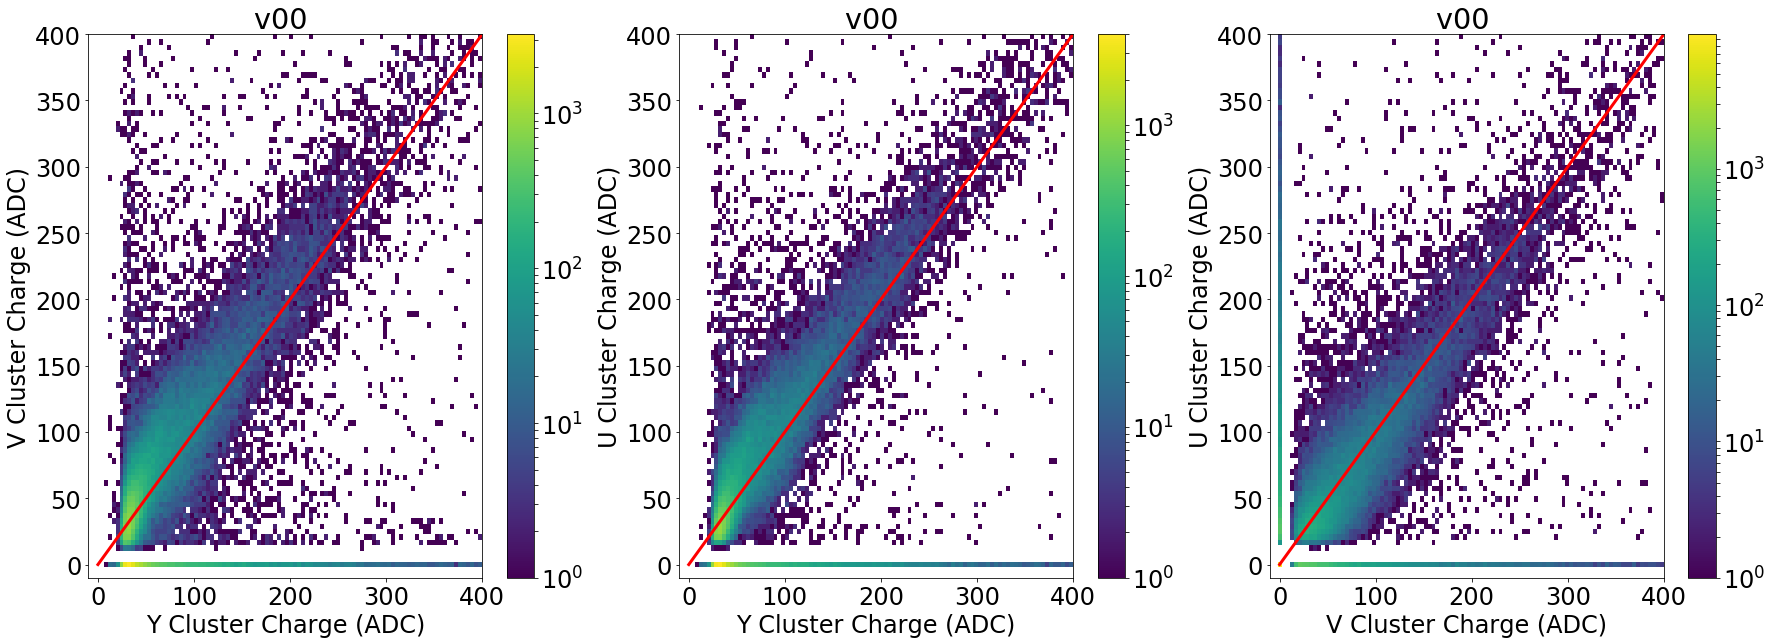

In [68]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v03['Y_cluster_charge'].values,df_Matching_v03['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v00 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v03['Y_cluster_charge'].values,df_Matching_v03['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v00 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v03['V_cluster_charge'].values,df_Matching_v03['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v00 ')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

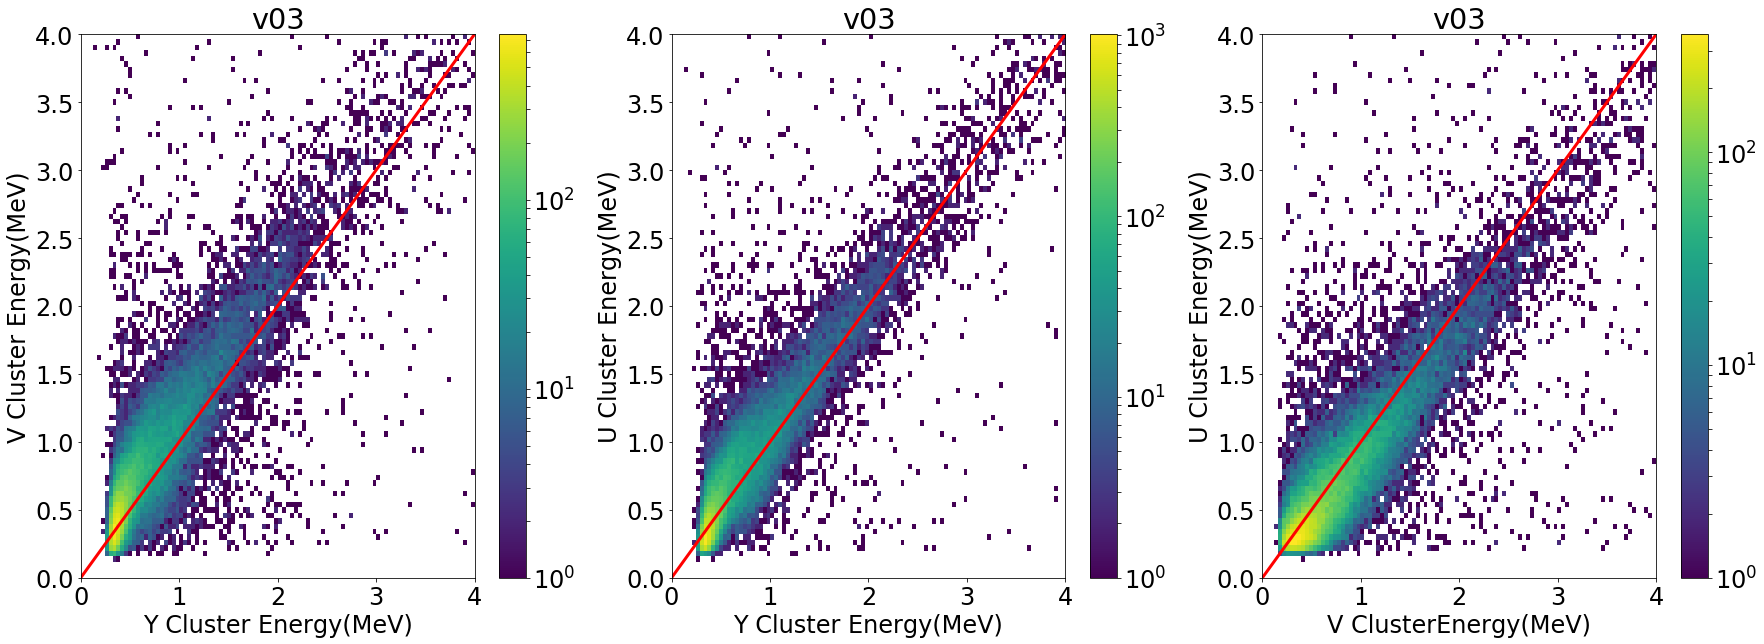

In [69]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge > 10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge >10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v03 = df_Matching_v03.query(CUT)

dfChargeCut_v03['energyY_v03'] = E_recoY_v03(dfChargeCut_v03,238.4)
dfChargeCut_v03['energyU_v03'] = E_recoU_v03(dfChargeCut_v03,232)
dfChargeCut_v03['energyV_v03'] = E_recoV_v03(dfChargeCut_v03,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v03['energyY_v03'].values,dfChargeCut_v03['energyV_v03'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v03')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v03['energyY_v03'].values,dfChargeCut_v03['energyU_v03'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v03')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v03['energyV_v03'].values,dfChargeCut_v03['energyU_v03'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v03')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

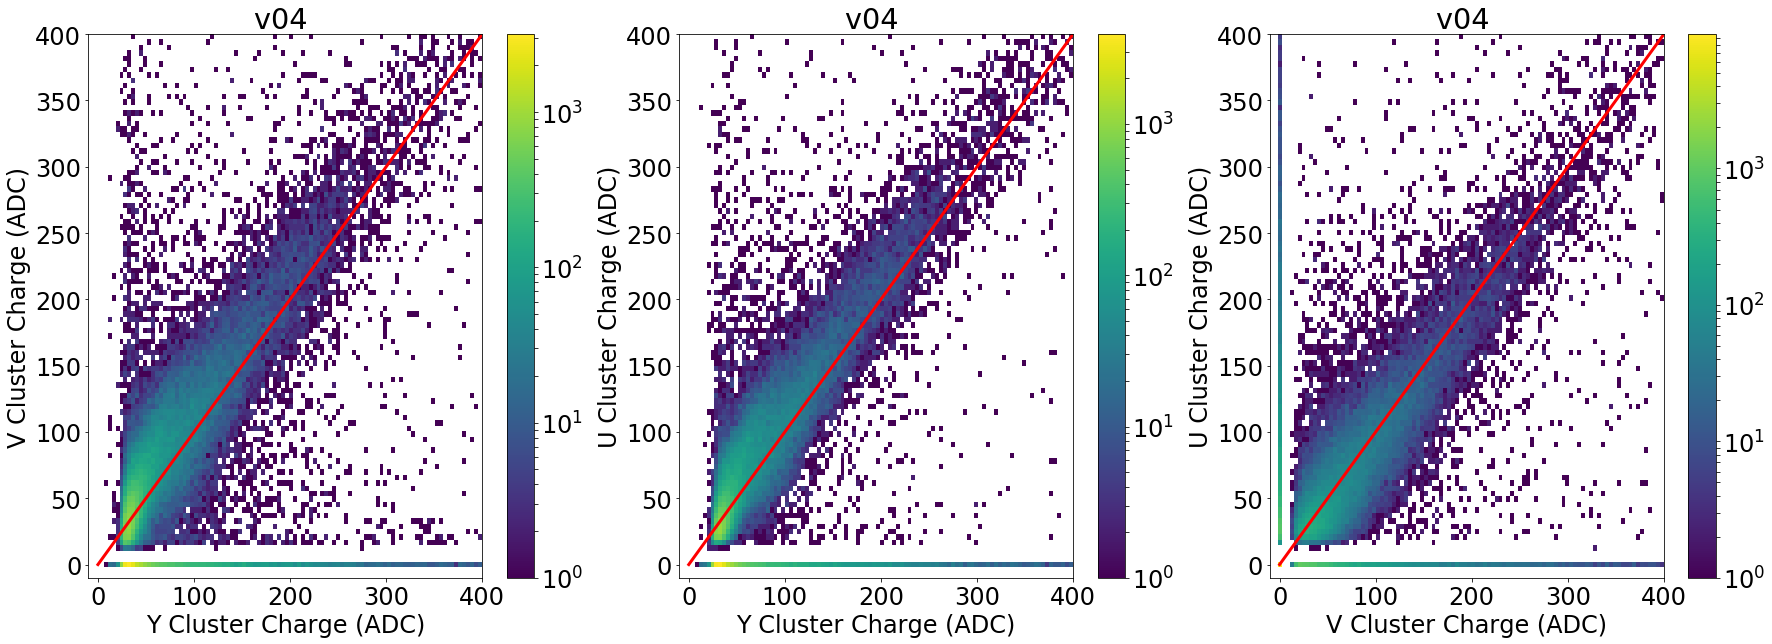

In [70]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v04['Y_cluster_charge'].values,df_Matching_v04['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v04['Y_cluster_charge'].values,df_Matching_v04['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v04['V_cluster_charge'].values,df_Matching_v04['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v04 ')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

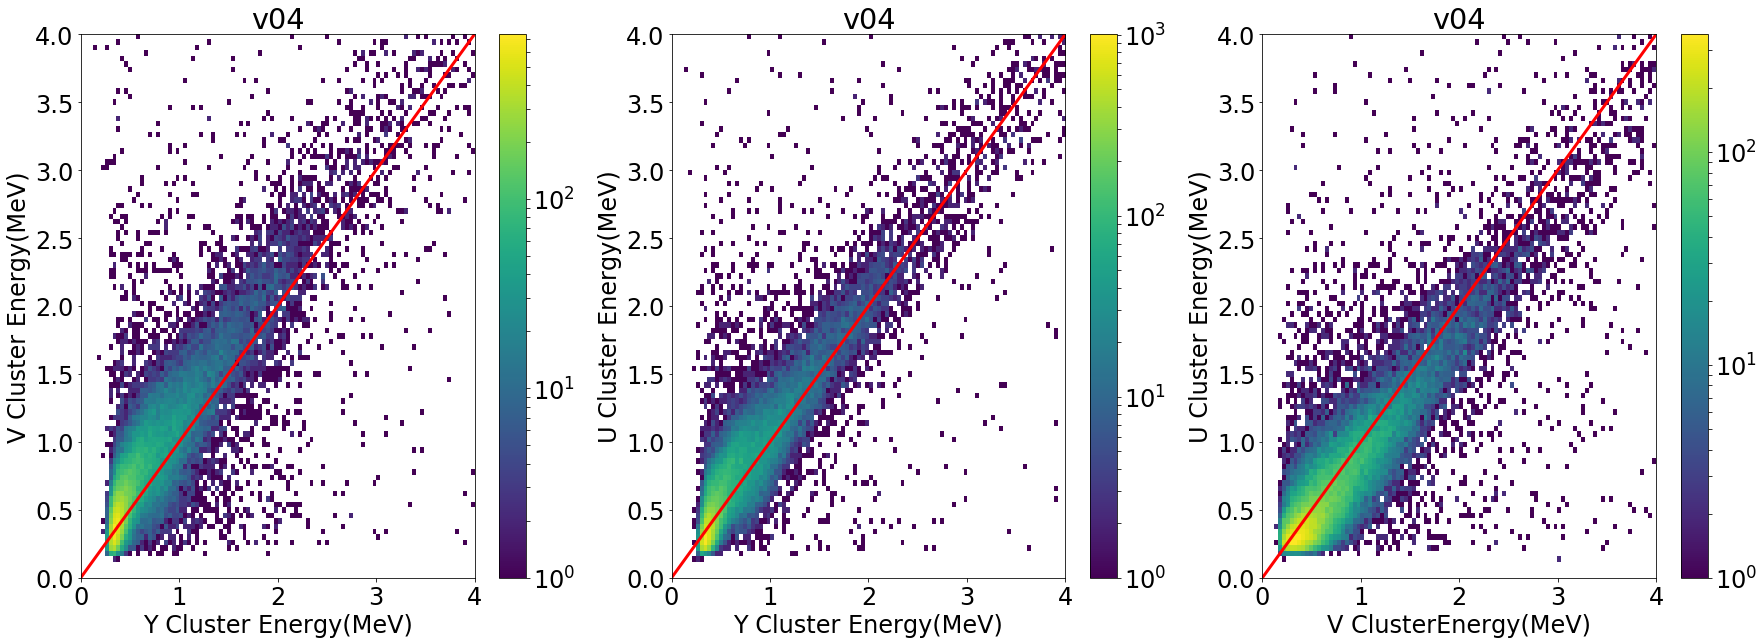

In [71]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge > 10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge >10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v04 = df_Matching_v04.query(CUT)

dfChargeCut_v04['energyY_v04'] = E_recoY_v04(dfChargeCut_v04,238.4)
dfChargeCut_v04['energyU_v04'] = E_recoU_v04(dfChargeCut_v04,232)
dfChargeCut_v04['energyV_v04'] = E_recoV_v04(dfChargeCut_v04,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v04['energyY_v04'].values,dfChargeCut_v04['energyV_v04'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v04')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v04['energyY_v04'].values,dfChargeCut_v04['energyU_v04'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v04')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v04['energyV_v04'].values,dfChargeCut_v04['energyU_v04'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v04')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

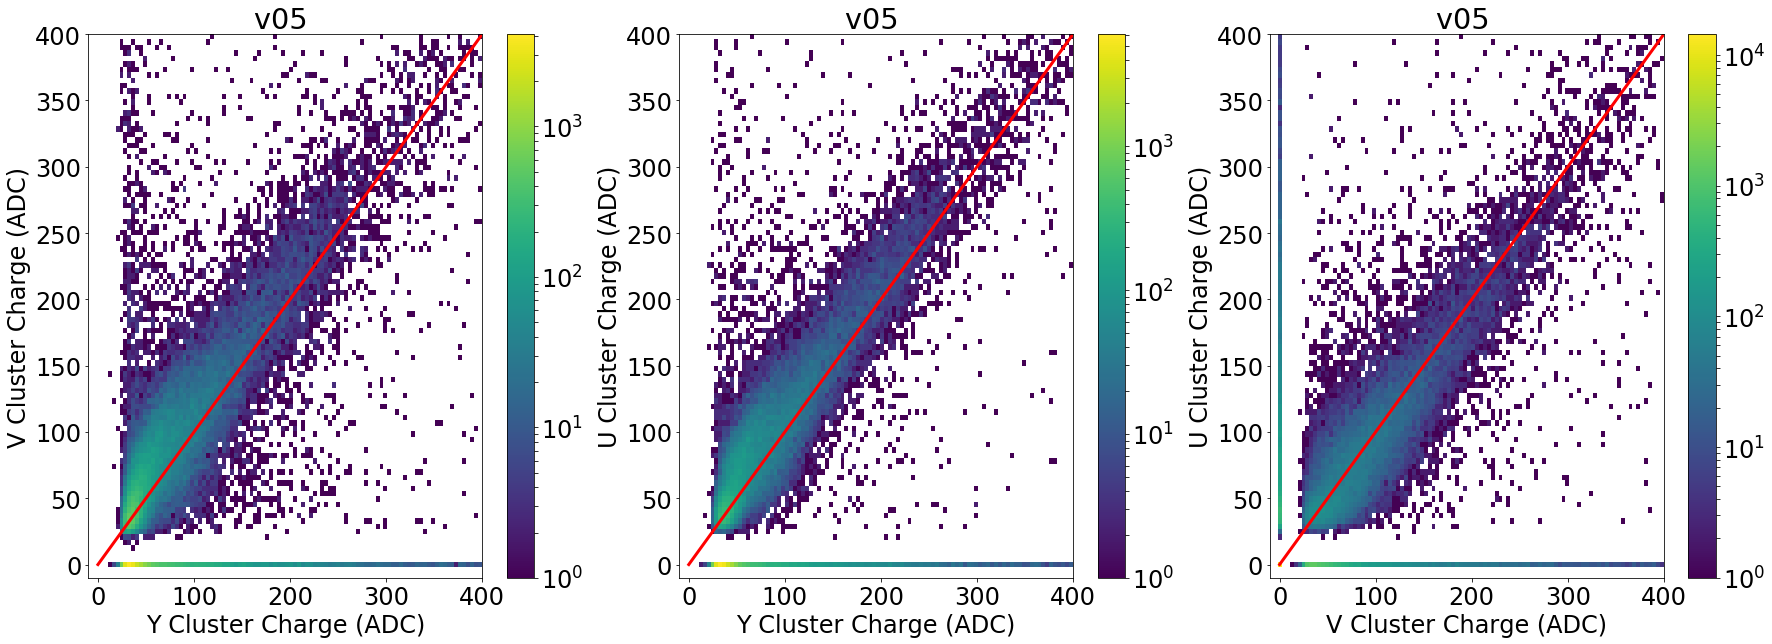

In [72]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v05['Y_cluster_charge'].values,df_Matching_v05['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v05 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v05['Y_cluster_charge'].values,df_Matching_v05['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v05 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v05['V_cluster_charge'].values,df_Matching_v05['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v05 ')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

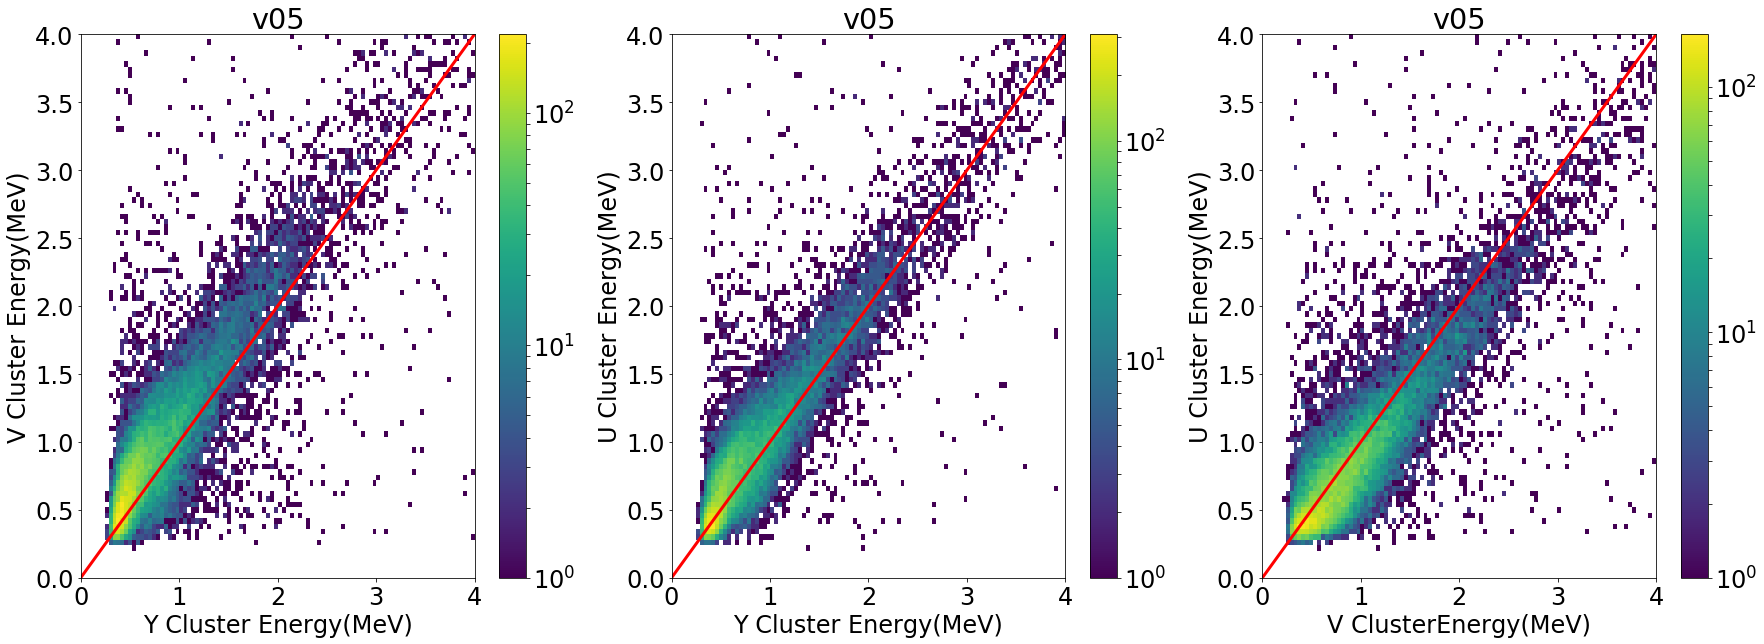

In [73]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge > 10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge >10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v05 = df_Matching_v05.query(CUT)

dfChargeCut_v05['energyY_v05'] = E_recoY_v05(dfChargeCut_v05,238.4)
dfChargeCut_v05['energyU_v05'] = E_recoU_v05(dfChargeCut_v05,232)
dfChargeCut_v05['energyV_v05'] = E_recoV_v05(dfChargeCut_v05,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v05['energyY_v05'].values,dfChargeCut_v05['energyV_v05'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v05')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v05['energyY_v05'].values,dfChargeCut_v05['energyU_v05'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v05')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v05['energyV_v05'].values,dfChargeCut_v05['energyU_v05'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v05')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00